In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df17 = pd.read_csv('df17.csv')

In [3]:
df7 = pd.read_csv('df7.csv')
df7

ABS ActiveSafetySysNote AdaptiveCruiseControl AdaptiveDrivingBeam  \
0           NaN                 NaN                   NaN                 NaN   
1           NaN                 NaN                   NaN                 NaN   
2      Standard                 NaN              Optional                 NaN   
3      Standard                 NaN                   NaN                 NaN   
4           NaN                 NaN                   NaN                 NaN   
...         ...                 ...                   ...                 ...   
90488       NaN                 NaN                   NaN                 NaN   
90489  Standard                 NaN                   NaN                 NaN   
90490       NaN                 NaN                   NaN                 NaN   
90491       NaN                 NaN                   NaN                 NaN   
90492       NaN                 NaN                   NaN                 NaN   

       AirBagLocCurtain                  AirBagLocFront  \
0              All Rows  1st Row (Driver and Passenger)   
1                   NaN  1st Row (Driver and Passenger)   
2              All Rows  1st Row (Driver and Passenger)   
3              All Rows  1st Row (Driver and Passenger)   
4                   NaN  1st Row (Driver and Passenger)   
...                 ...                             ...   
90488          All Rows  1st Row (Driver and Passenger)   
90489  1st and 2nd Rows  1st Row (Driver and Passenger)   
90490               NaN  1st Row (Driver and Passenger)   
90491          All Rows  1st Row (Driver and Passenger)   
90492               NaN  1st Row (Driver and Passenger)   

                        AirBagLocKnee AirBagLocSeatCushion  \
0                                 NaN                  NaN   
1                                 NaN                  NaN   
2                                 NaN                  NaN   
3      1st Row (Driver and Passenger)                  NaN   
4                                 NaN                  NaN   
...                               ...                  ...   
90488  1st Row (Driver and Passenger)                  NaN   
90489  1st Row (Driver and Passenger)                  NaN   
90490                             NaN                  NaN   
90491                             NaN                  NaN   
90492                             NaN                  NaN   

                        AirBagLocSide AutoReverseSystem  ...    type  \
0      1st Row (Driver and Passenger)               NaN  ...  pickup   
1      1st Row (Driver and Passenger)               NaN  ...  pickup   
2      1st Row (Driver and Passenger)          Standard  ...  pickup   
3      1st Row (Driver and Passenger)          Standard  ...  pickup   
4                                 NaN               NaN  ...  pickup   
...                               ...               ...  ...     ...   
90488                1st and 2nd Rows               NaN  ...   sedan   
90489  1st Row (Driver and Passenger)          Standard  ...   sedan   
90490  1st Row (Driver and Passenger)               NaN  ...   sedan   
90491  1st Row (Driver and Passenger)               NaN  ...   wagon   
90492                             NaN               NaN  ...   sedan   

      paint_color                                          image_url  \
0           white  https://images.craigslist.org/00R0R_lwWjXSEWNa...   
1            blue  https://images.craigslist.org/00R0R_lwWjXSEWNa...   
2             red  https://images.craigslist.org/01212_jjirIWa0y0...   
3             red  https://images.craigslist.org/00x0x_1y9kIOzGCF...   
4           black  https://images.craigslist.org/00V0V_ftJbKrOgdi...   
...           ...                                                ...   
90488       white  https://images.craigslist.org/00y0y_9cv6BwbxV3...   
90489       black  https://images.craigslist.org/00N0N_1xMPvfxRAI...   
90490        blue  https://images.craigslist.org/00m0m_fUrBFn6puq...   


In [4]:
df7.Doors.isnull().sum()

14965

In [5]:
chk_nulls = [x for x in list(set(['Doors',
'DriveType',
'EngineCylinders',
'FuelTypePrimary',
'BodyCabType',
'EngineHP',
'EngineConfiguration']+['TransmissionStyle','TransmissionSpeeds']+cat_feats)) if x not in ['DisplacementCC','BodyClass','VehicleType','GVWR']]


In [7]:
import scipy.stats as stats

groups = [group['price'].values for name, group in df17.groupby('Make')]
anova_result = stats.f_oneway(*groups)

print("ANOVA results:")
print(f"F-statistic: {anova_result.statistic}")
print(f"P-value: {anova_result.pvalue}")

ANOVA results:
F-statistic: 104.06027053342477
P-value: 0.0


In [8]:
import scipy.stats as stats

groups = [group['price'].values for name, group in df17.groupby('Make')]
anova_result = stats.f_oneway(*groups)

print("ANOVA results:")
print(f"F-statistic: {anova_result.statistic}")
print(f"P-value: {anova_result.pvalue}")

ANOVA results:
F-statistic: 281.2671498063885
P-value: 0.0


In [9]:
import scipy.stats as stats

groups = [group['price'].values for name, group in df17.groupby('region')]
anova_result = stats.f_oneway(*groups)

print("ANOVA results:")
print(f"F-statistic: {anova_result.statistic}")
print(f"P-value: {anova_result.pvalue}")

ANOVA results:
F-statistic: 28.751899141921882
P-value: 0.0


In [10]:
import scipy.stats as stats

groups = [group['price'].values for name, group in df17.groupby('Model')]
anova_result = stats.f_oneway(*groups)

print("ANOVA results:")
print(f"F-statistic: {anova_result.statistic}")
print(f"P-value: {anova_result.pvalue}")

ANOVA results:
F-statistic: 85.65923079831845
P-value: 0.0


In [ ]:
import scipy.stats as stats

groups = [group['price'].values for name, group in df17.groupby('Model')]
anova_result = stats.f_oneway(*groups)

print("ANOVA results:")
print(f"F-statistic: {anova_result.statistic}")
print(f"P-value: {anova_result.pvalue}")

In [43]:
res_d = {}
for col in cat_feats+['VehicleType','Make','Model','ModelYear','Series','Trim','state','region']:
    
    groups = [group['price'].values for name, group in df17.groupby(col)]
    anova_result = stats.f_oneway(*groups)

    res_d[col] = (anova_result.statistic,anova_result.pvalue)
    #print("ANOVA results:")
    #print(f"F-statistic: {anova_result.statistic}")
    #print(f"P-value: {anova_result.pvalue}")

In [44]:
anova_res = pd.DataFrame(res_d).rename({0:'f-stat',1:'p-value'})

In [49]:
a_res = anova_res.T.sort_values(by='f-stat')

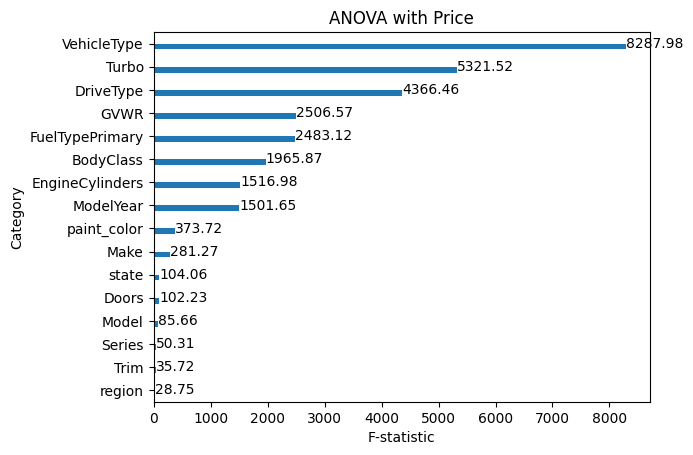

In [50]:
a_res.plot(kind='barh', legend=False)

# Add labels and title
plt.title('ANOVA with Price')
plt.xlabel('F-statistic')
plt.ylabel('Category')

# Add height labels on the bars
for index, value in enumerate(a_res[['f-stat']].values):
    plt.text(value[0], index, f'{value[0]:.2f}', ha='left', va='center')

plt.show()

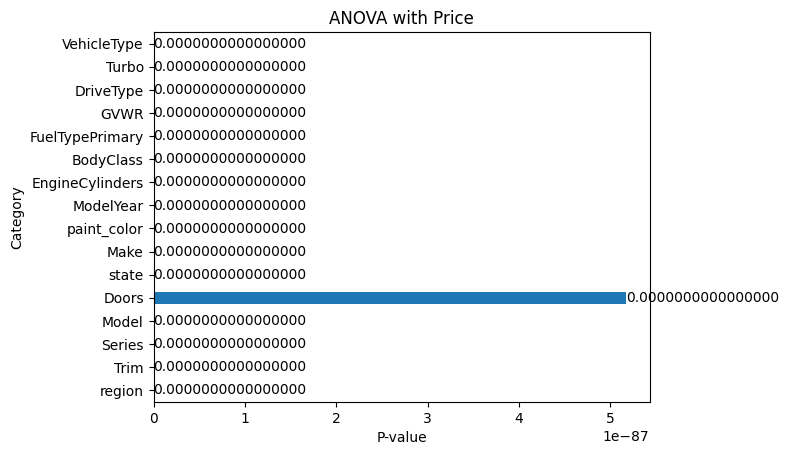

In [58]:
a_res[['p-value']].plot(kind='barh', legend=False)

# Add labels and title
plt.title('ANOVA with Price')
plt.xlabel('P-value')
plt.ylabel('Category')

# Add height labels on the bars
for index, value in enumerate(a_res[['p-value']].values):
    plt.text(value[0], index, f'{value[0]:.16f}', ha='left', va='center')

plt.show()

In [12]:
df7.model.isnull().sum()

430

In [17]:
import statsmodels.api as sm

df17_dummies = pd.get_dummies(df17['state'], drop_first=True)
X = sm.add_constant(df17_dummies)  # Add a constant (intercept)
y = df17['price']

# Fit the regression model
model = sm.OLS(y, X).fit()

# Get the summary of the regression
print(model.summary())

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [25]:
df7[df7.manufacturer.notna() & df7.manufacturer.str.lower().str.contains('chev')]['manufacturer'].unique()

array(['chevrolet'], dtype=object)

In [26]:
df7.drive.value_counts(dropna=False)

drive
4wd    31740
fwd    29138
NaN    19420
rwd    10195
Name: count, dtype: int64

In [27]:
df7.paint_color.value_counts(dropna=False)

paint_color
NaN       19438
white     17518
black     15729
silver    11580
blue       7621
red        6729
grey       6417
custom     1698
green      1485
brown      1401
orange      388
yellow      327
purple      162
Name: count, dtype: int64

In [28]:
df7.transmission.value_counts(dropna=False)

transmission
automatic    77273
other         8774
manual        3854
NaN            592
Name: count, dtype: int64

In [29]:
df7.condition.value_counts(dropna=False)

condition
NaN          41943
excellent    24375
good         20376
like new      3270
fair           529
Name: count, dtype: int64

In [31]:
df7['size'].value_counts(dropna=False)

size
NaN            66748
full-size      11967
mid-size        6816
compact         4140
sub-compact      822
Name: count, dtype: int64

In [33]:
df7['cylinders'].value_counts(dropna=False)

cylinders
NaN             36503
6 cylinders     20382
4 cylinders     20174
8 cylinders     12471
5 cylinders       470
other             215
3 cylinders       126
10 cylinders      110
12 cylinders       42
Name: count, dtype: int64

In [20]:
df7[df7.model.notna() & df7.model.str.contains('sierra 1500')]['model'].unique().size

113

In [ ]:
sierra_models = df7[df7.model.notna() & df7.model.str.contains('sierra 1500')]['model'].unique()
print('sierra 1500 unique values: ' + str(sierra_models.size))
print('\n')
print(sierra_models)

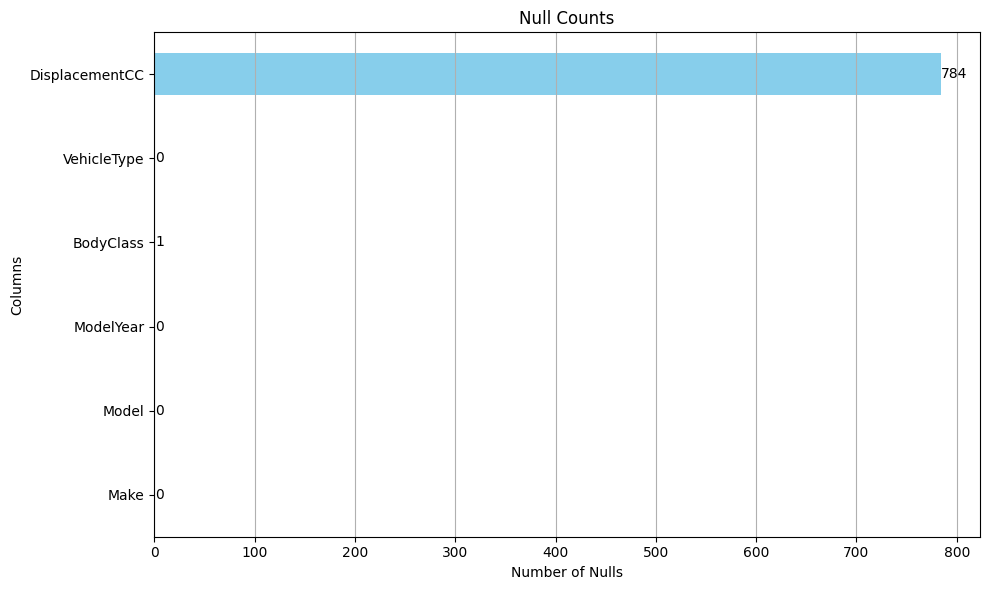

In [251]:
null_counts = df7[['Make','Model','ModelYear','BodyClass','VehicleType','DisplacementCC']].isnull().sum()

# Create a horizontal bar graph
plt.figure(figsize=(10, 6))
ax = null_counts.plot(kind='barh', color='skyblue')
plt.title('Null Counts')
plt.xlabel('Number of Nulls')
plt.ylabel('Columns')
plt.grid(axis='x')

# Annotate each bar with the height
for index, value in enumerate(null_counts):
    ax.text(value + 0.5, index, str(value), ha='left', va='center')

# Show the plot
plt.tight_layout()
plt.show()

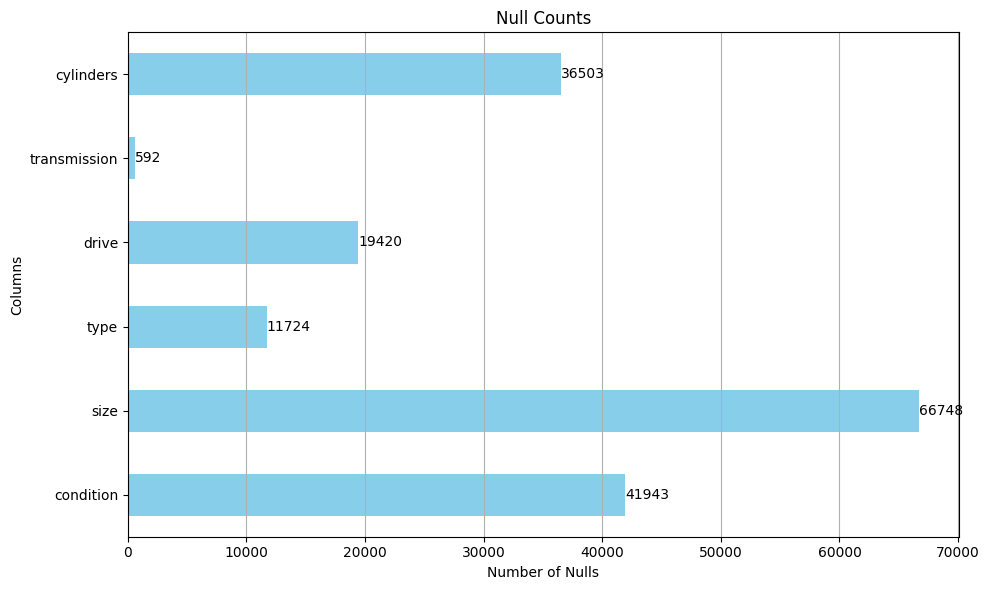

In [252]:
null_counts = df7[['condition', 'size','type','drive','transmission','cylinders']].isnull().sum()

# Create a horizontal bar graph
plt.figure(figsize=(10, 6))
ax = null_counts.plot(kind='barh', color='skyblue')
plt.title('Null Counts')
plt.xlabel('Number of Nulls')
plt.ylabel('Columns')
plt.grid(axis='x')

# Annotate each bar with the height
for index, value in enumerate(null_counts):
    ax.text(value + 0.5, index, str(value), ha='left', va='center')

# Show the plot
plt.tight_layout()
plt.show()

Text(0.5, 0, 'Price')

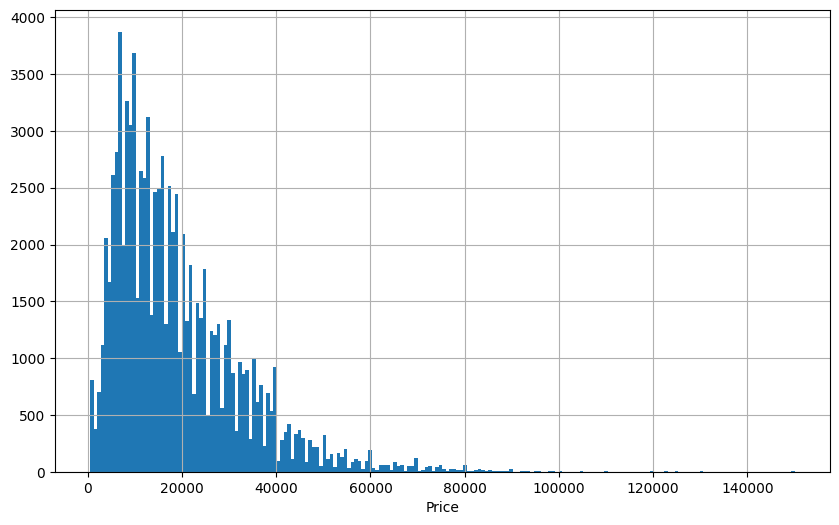

In [123]:
plt.figure(figsize=(10, 6))
df17.price.hist(bins=200)
plt.xlabel('Price')

Text(0.5, 0, 'Price')

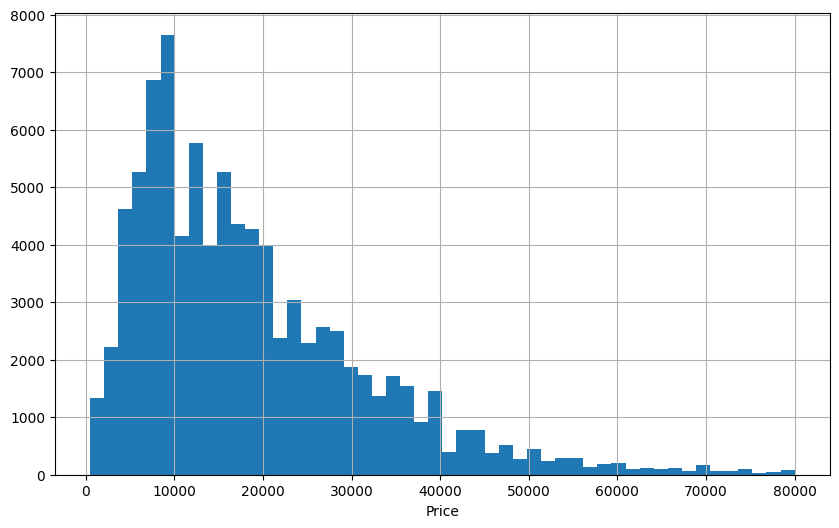

In [126]:
plt.figure(figsize=(10, 6))
df17[df17.price<80000]['price'].hist(bins=50)
plt.xlabel('Price')

Text(0.5, 1.0, 'Odometer vs. price')

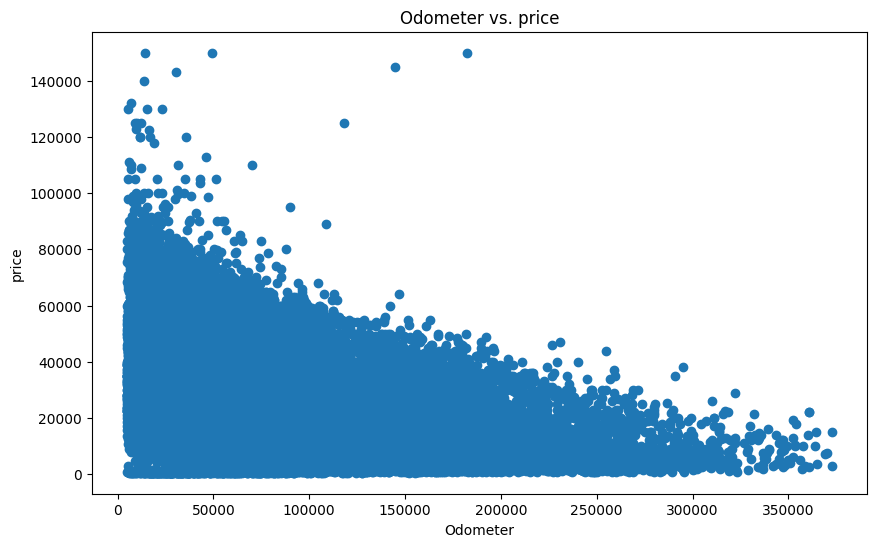

In [132]:
plt.figure(figsize=(10, 6))
plt.scatter(df17.odometer, df17.price)
plt.xlabel('Odometer')
plt.ylabel('price')
plt.title('Odometer vs. price')

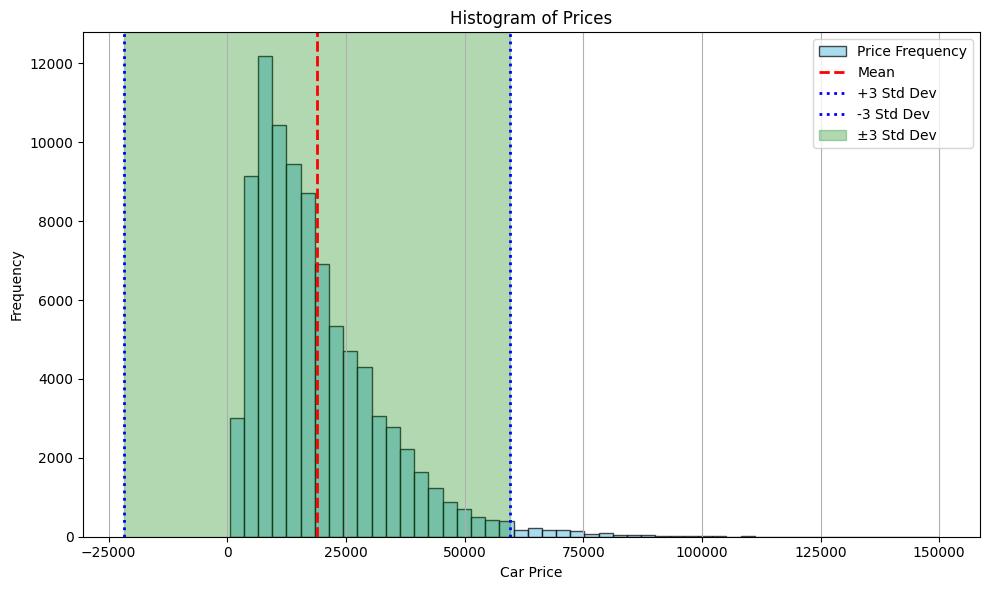

In [138]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate mean and standard deviation
mean = df17['price'].mean()
std_dev = df17['price'].std()
three_std_dev = 3 * std_dev

# Create a histogram of the odometer values
plt.figure(figsize=(10, 6))
ax = df17['price'].hist(bins=50, color='skyblue', edgecolor='black', alpha=0.7, label='Price Frequency')

# Add mean line
plt.axvline(mean, color='red', linestyle='dashed', linewidth=2, label='Mean')

# Add dotted lines for ±3 standard deviations
plt.axvline(mean + three_std_dev, color='blue', linestyle='dotted', linewidth=2, label='+3 Std Dev')
plt.axvline(mean - three_std_dev, color='blue', linestyle='dotted', linewidth=2, label='-3 Std Dev')
plt.axvspan(mean - three_std_dev, mean + three_std_dev, color='green', alpha=0.3, label='±3 Std Dev')
# Add labels and title
plt.xlabel('Car Price')
plt.ylabel('Frequency')
plt.title('Histogram of Prices')
plt.grid(axis='y')

# Add a legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Year vs. Price')

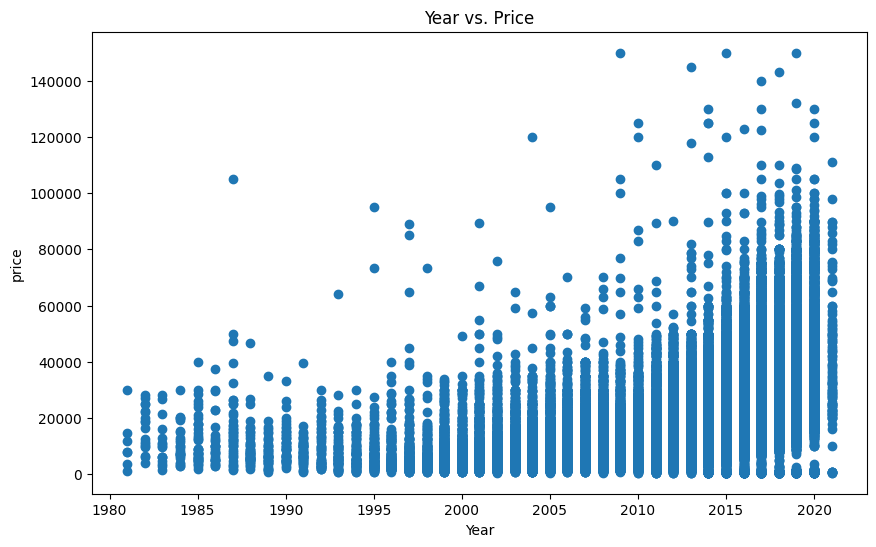

In [268]:
#df_t = df17[df17.price < 2500]

plt.figure(figsize=(10,6))
plt.scatter(df17.ModelYear, df17.price)
plt.xlabel('Year')
plt.ylabel('price')
plt.title('Year vs. Price')

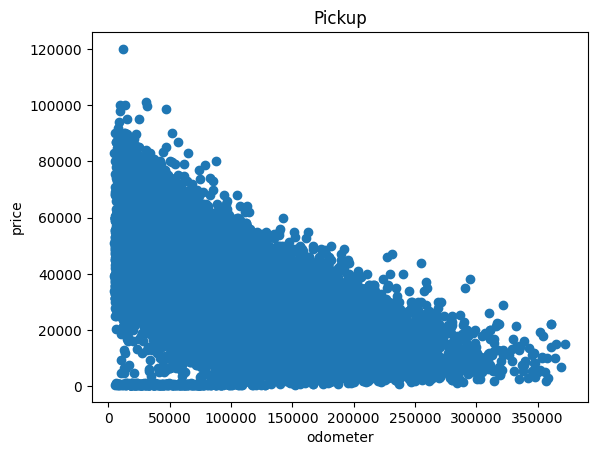

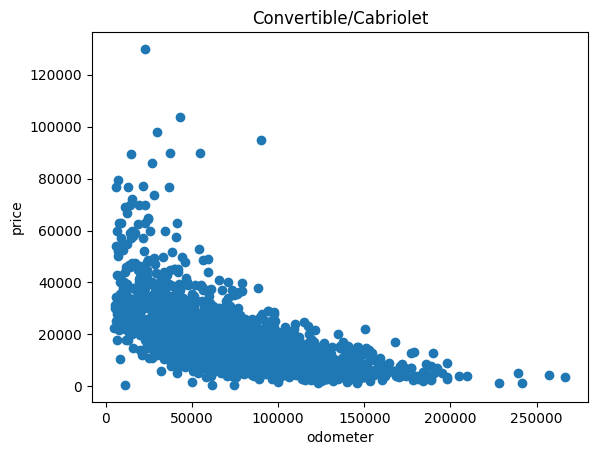

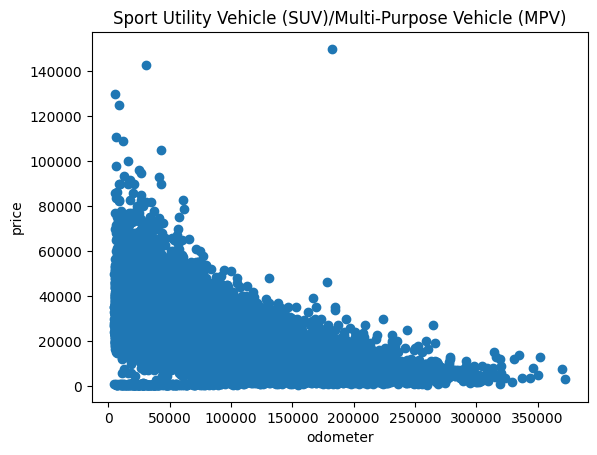

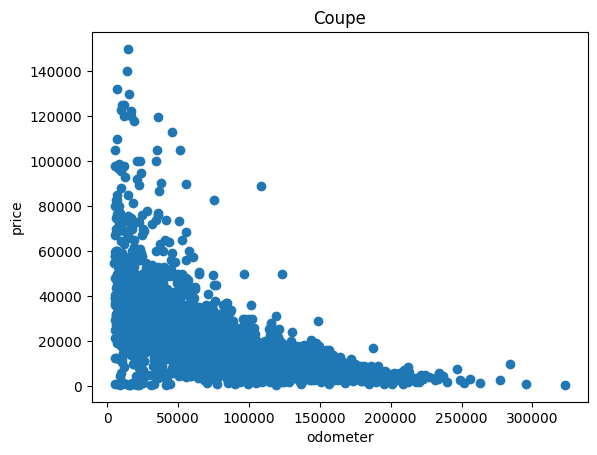

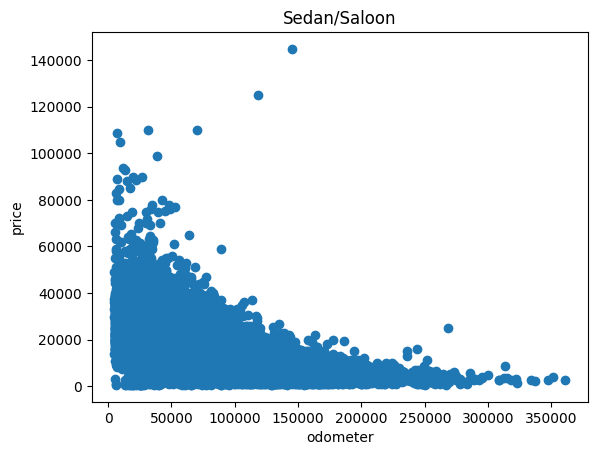

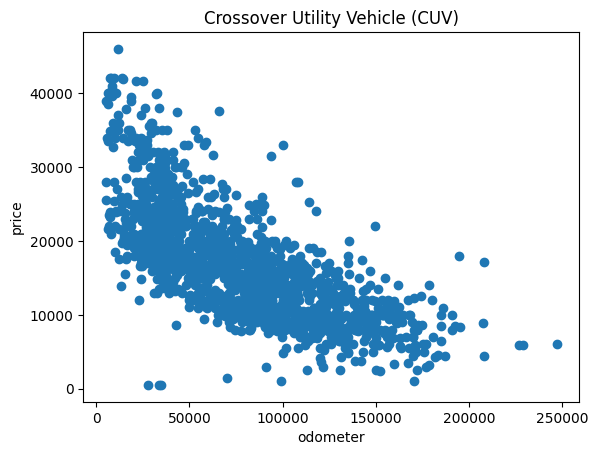

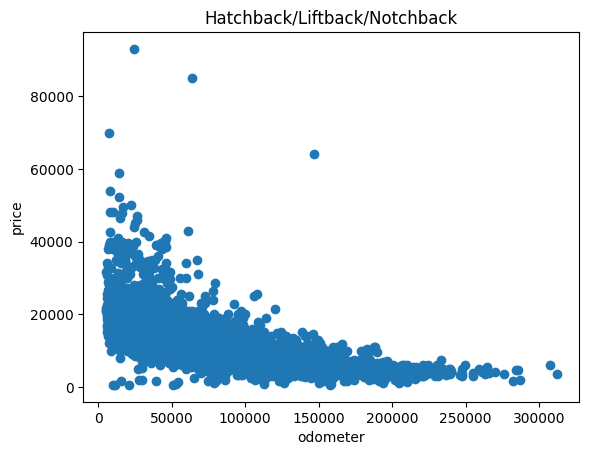

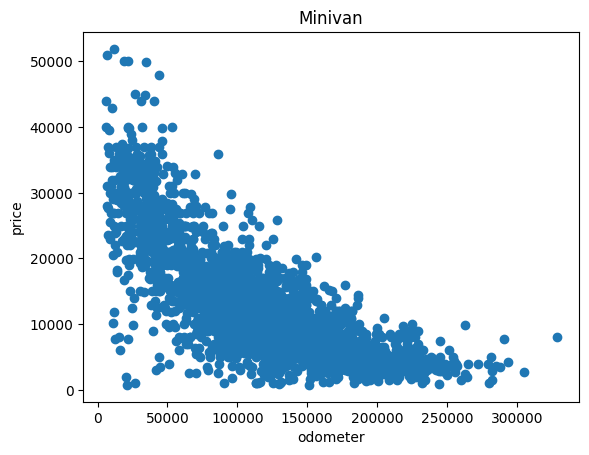

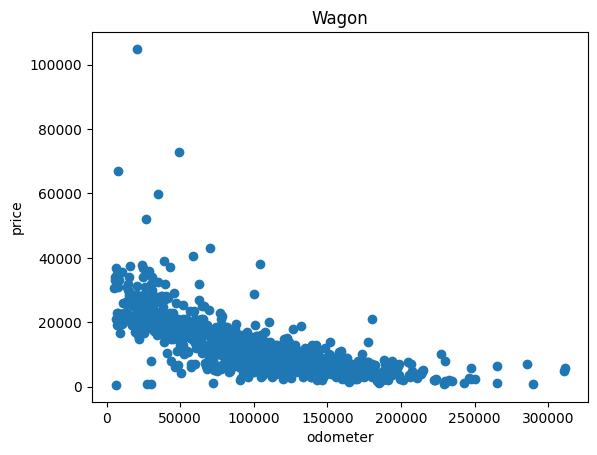

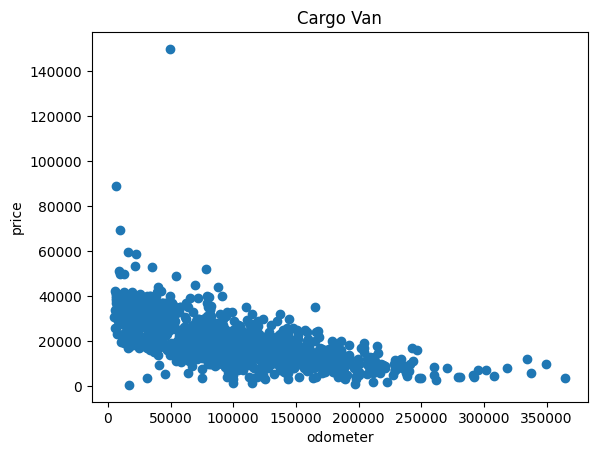

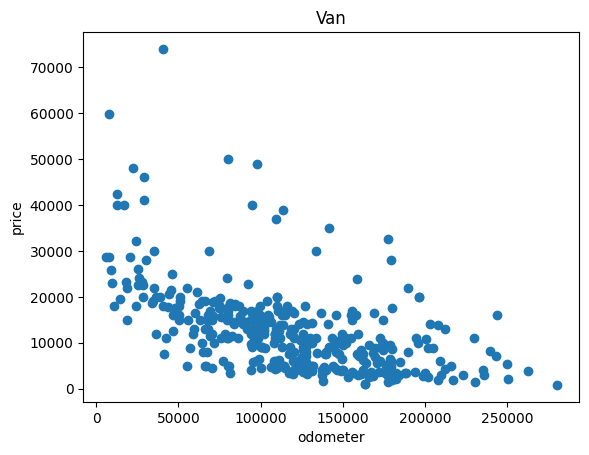

{'Pickup': -0.6093392720869433,
 'Convertible/Cabriolet': -0.6156153641838132,
 'Sport Utility Vehicle (SUV)/Multi-Purpose Vehicle (MPV)': -0.6593765698368734,
 'Coupe': -0.6155443373985,
 'Sedan/Saloon': -0.6667904836485888,
 'Crossover Utility Vehicle (CUV)': -0.7220248652071428,
 'Hatchback/Liftback/Notchback': -0.6754889479201673,
 'Minivan': -0.7575378843379904,
 'Wagon': -0.6900632549329146,
 'Cargo Van': -0.6806696077687611,
 'Van': -0.5457257514767458}

In [274]:
corr_res = {}

for bc in df17.BodyClass.unique():
    t_df = df17[df17.BodyClass==bc]
    corr_res[bc] = t_df['price'].corr(t_df['odometer'])
    plt.scatter(t_df['odometer'], t_df['price'])
    plt.title(bc)
    plt.xlabel('odometer')
    plt.ylabel('price')
    plt.show()
corr_res

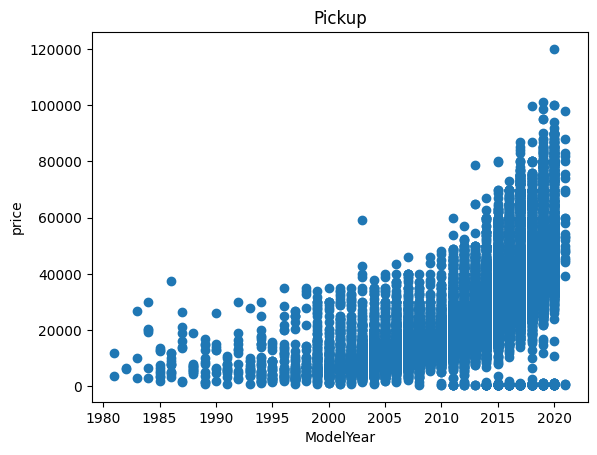

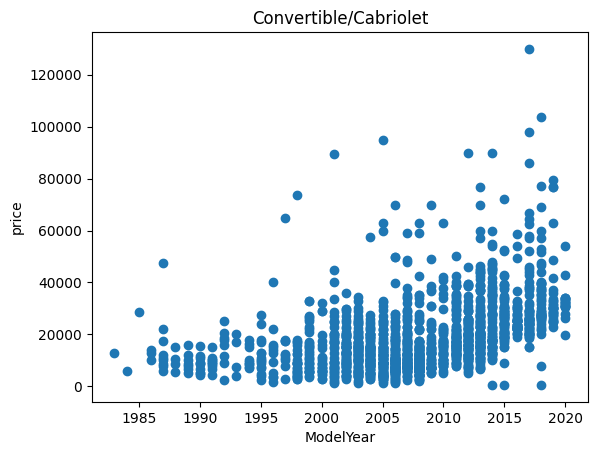

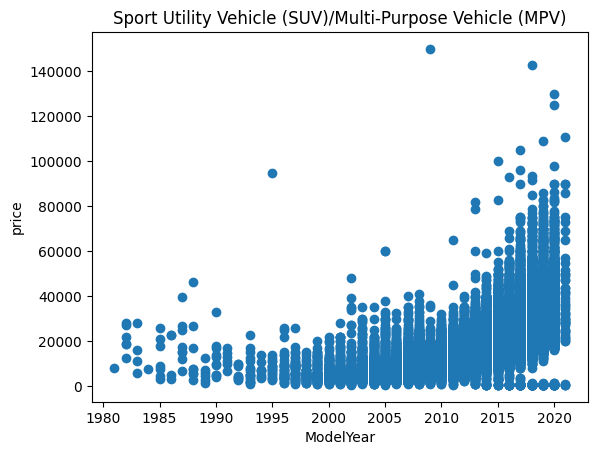

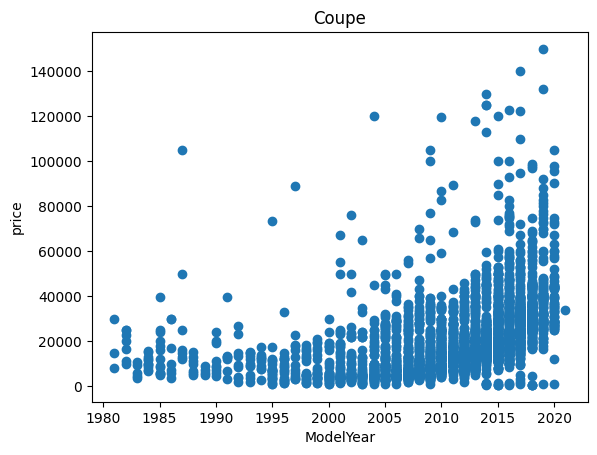

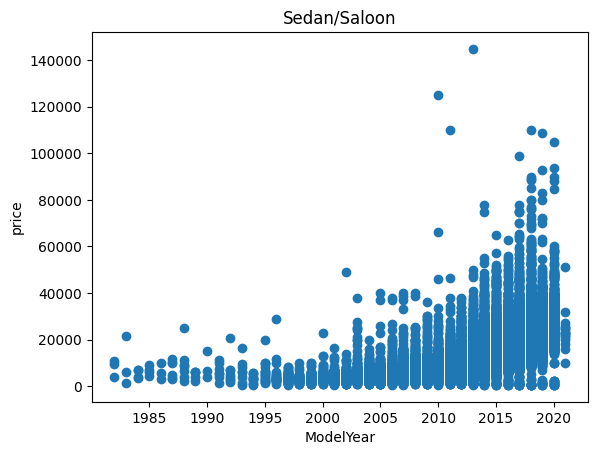

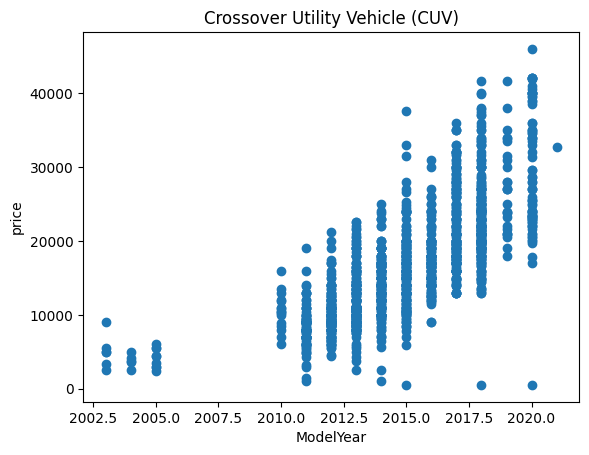

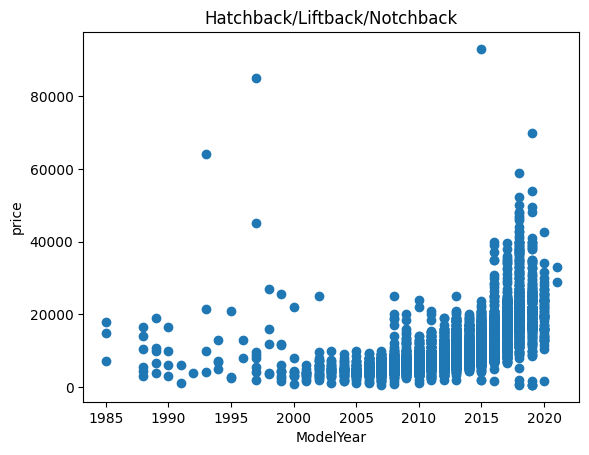

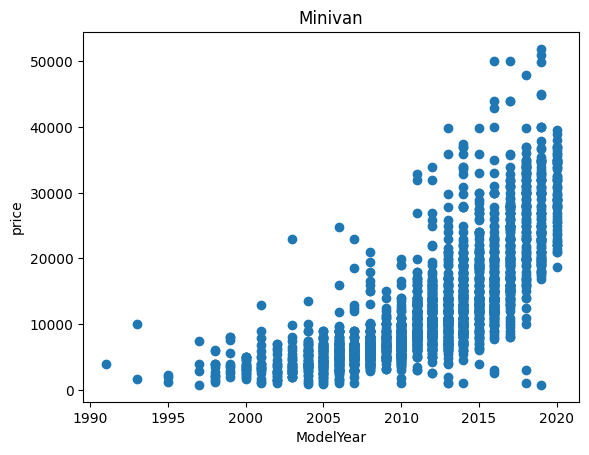

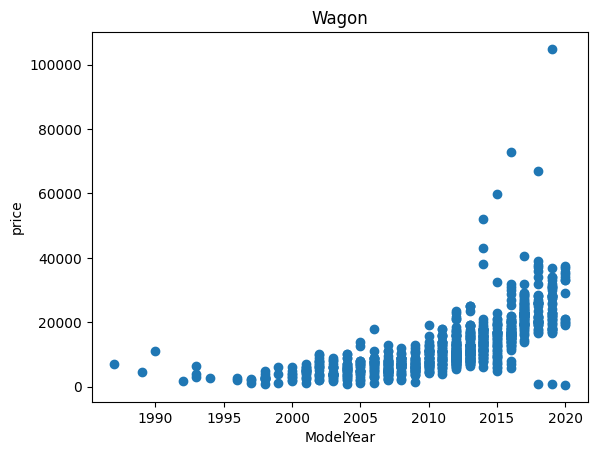

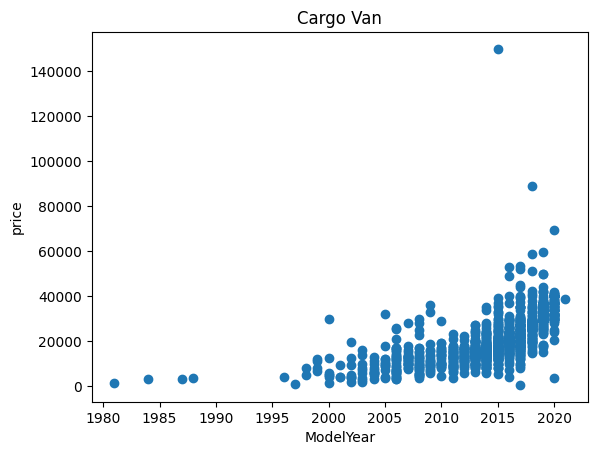

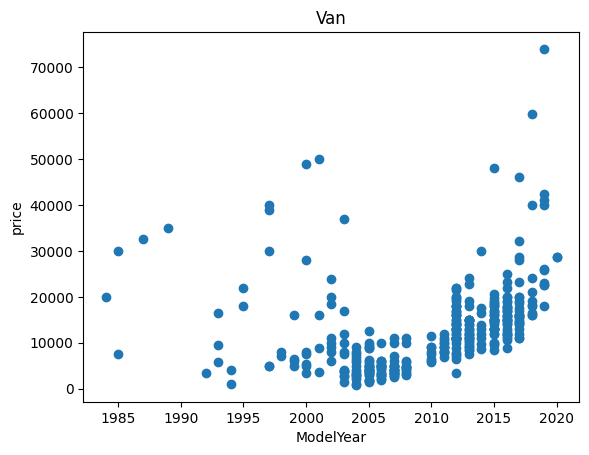

{'Pickup': 0.6645671630685019,
 'Convertible/Cabriolet': 0.44112814124175426,
 'Sport Utility Vehicle (SUV)/Multi-Purpose Vehicle (MPV)': 0.6437876913255052,
 'Coupe': 0.40522207337710586,
 'Sedan/Saloon': 0.6179199830122393,
 'Crossover Utility Vehicle (CUV)': 0.7510813921452899,
 'Hatchback/Liftback/Notchback': 0.5805906587062357,
 'Minivan': 0.7374352251815435,
 'Wagon': 0.6790294164900557,
 'Cargo Van': 0.650680267959511,
 'Van': 0.3144839865192551}

In [275]:
corr_res = {}

for bc in df17.BodyClass.unique():
    t_df = df17[df17.BodyClass==bc]
    corr_res[bc] = t_df['price'].corr(t_df['ModelYear'])
    plt.scatter(t_df['ModelYear'], t_df['price'])
    plt.title(bc)
    plt.xlabel('ModelYear')
    plt.ylabel('price')
    plt.show()
corr_res

In [285]:
cat_feats

['Turbo',
 'BodyClass',
 'FuelTypePrimary',
 'EngineCylinders',
 'VehicleType',
 'DriveType',
 'GVWR',
 'Doors',
 'paint_color']

Overall Model Results:
Intercept: -1816291.57
ModelYear: 915.25
odometer: -0.08

Body Class Model Results:

Pickup:
Intercept: -2726347.18
ModelYear: 1372.96
odometer: -0.08

Convertible/Cabriolet:
Intercept: -939603.27
ModelYear: 483.54
odometer: -0.17

Sport Utility Vehicle (SUV)/Multi-Purpose Vehicle (MPV):
Intercept: -1578583.71
ModelYear: 797.32
odometer: -0.08

Coupe:
Intercept: -793146.31
ModelYear: 411.66
odometer: -0.18

Sedan/Saloon:
Intercept: -1193657.89
ModelYear: 603.61
odometer: -0.08

Crossover Utility Vehicle (CUV):
Intercept: -2565171.07
ModelYear: 1283.91
odometer: -0.07

Hatchback/Liftback/Notchback:
Intercept: -808826.00
ModelYear: 410.96
odometer: -0.08

Minivan:
Intercept: -1501769.78
ModelYear: 757.08
odometer: -0.07

Wagon:
Intercept: -1285719.47
ModelYear: 649.03
odometer: -0.07

Cargo Van:
Intercept: -1769268.71
ModelYear: 892.53
odometer: -0.08

Van:
Intercept: -187713.01
ModelYear: 104.87
odometer: -0.09


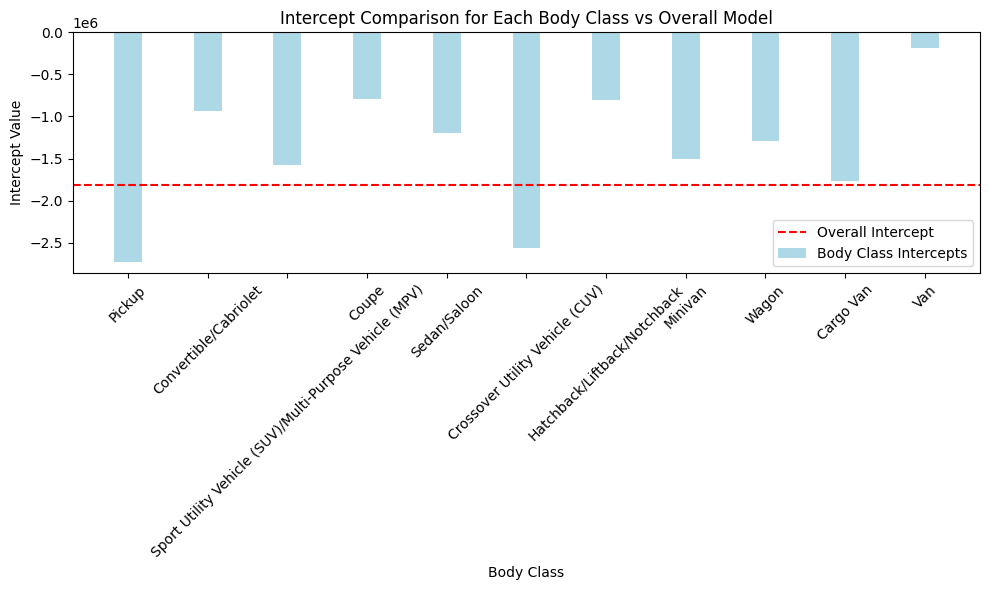

In [286]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Prepare to hold the results
overall_results = {}
body_class_results = {}

# Define the features and the target variable
features = ['ModelYear', 'odometer']
target = 'price'

# Fit the overall model
X_overall = df17[features]
y_overall = df17[target]
overall_model = LinearRegression()
overall_model.fit(X_overall, y_overall)

# Store overall model results
overall_intercept = overall_model.intercept_
overall_coefficients = overall_model.coef_

overall_results['intercept'] = overall_intercept
overall_results['coefficients'] = overall_coefficients

# Fit models for each body class
for bc in df17.BodyClass.unique():
    t_df = df17[df17.BodyClass == bc]

    # Ensure there are enough data points
    if len(t_df) > len(features):
        X_body_class = t_df[features]
        y_body_class = t_df[target]

        body_class_model = LinearRegression()
        body_class_model.fit(X_body_class, y_body_class)

        # Store results
        body_class_results[bc] = {
            'intercept': body_class_model.intercept_,
            'coefficients': body_class_model.coef_
        }

# Print overall model results
print("Overall Model Results:")
print(f"Intercept: {overall_intercept:.2f}")
for feature, coef in zip(features, overall_coefficients):
    print(f"{feature}: {coef:.2f}")

print("\nBody Class Model Results:")
# Print body class model results
for bc, results in body_class_results.items():
    print(f"\n{bc}:")
    print(f"Intercept: {results['intercept']:.2f}")
    for feature, coef in zip(features, results['coefficients']):
        print(f"{feature}: {coef:.2f}")

# Optional: Visualize the comparison
body_class_names = list(body_class_results.keys())
intercepts = [results['intercept'] for results in body_class_results.values()]
overall_intercept_value = overall_intercept

plt.figure(figsize=(10, 6))
bar_width = 0.35
x = np.arange(len(body_class_names))

# Plot intercepts
plt.bar(x, intercepts, width=bar_width, label='Body Class Intercepts', color='lightblue')
plt.axhline(y=overall_intercept_value, color='red', linestyle='--', label='Overall Intercept')

# Labeling
plt.title('Intercept Comparison for Each Body Class vs Overall Model')
plt.xlabel('Body Class')
plt.ylabel('Intercept Value')
plt.xticks(x, body_class_names, rotation=45)
plt.legend()

plt.tight_layout()
plt.show()


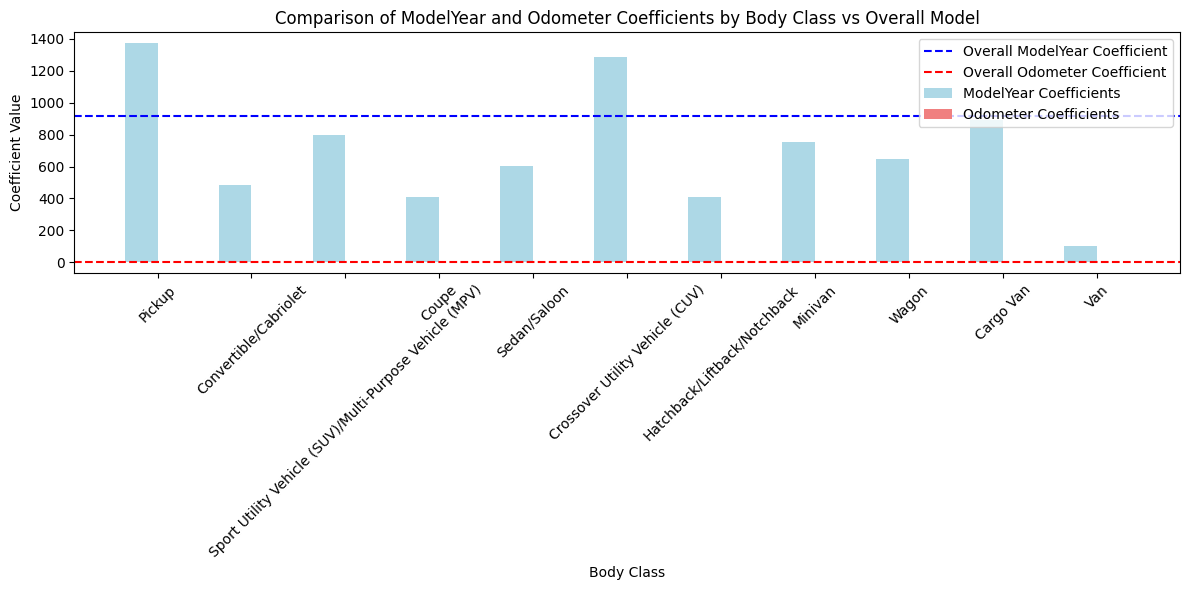

In [289]:
import matplotlib.pyplot as plt
import numpy as np

# Prepare data for plotting
body_class_names = list(body_class_results.keys())
modelyear_coeffs = [results['coefficients'][0] for results in body_class_results.values()]
odometer_coeffs = [results['coefficients'][1] for results in body_class_results.values()]

# Include overall model coefficients
overall_modelyear_coef = overall_coefficients[0]
overall_odometer_coef = overall_coefficients[1]

# Create a bar plot for comparison
bar_width = 0.35
x = np.arange(len(body_class_names))

plt.figure(figsize=(12, 6))

# Plot ModelYear coefficients
plt.bar(x - bar_width/2, modelyear_coeffs, width=bar_width, label='ModelYear Coefficients', color='lightblue')

# Plot Odometer coefficients
plt.bar(x + bar_width/2, odometer_coeffs, width=bar_width, label='Odometer Coefficients', color='lightcoral')

# Add overall model coefficients as horizontal lines
plt.axhline(y=overall_modelyear_coef, color='blue', linestyle='--', label='Overall ModelYear Coefficient')
plt.axhline(y=overall_odometer_coef, color='red', linestyle='--', label='Overall Odometer Coefficient')

# Labeling
plt.title('Comparison of ModelYear and Odometer Coefficients by Body Class vs Overall Model')
plt.xlabel('Body Class')
plt.ylabel('Coefficient Value')
plt.xticks(x, body_class_names, rotation=45)
plt.legend()

plt.tight_layout()
plt.show()


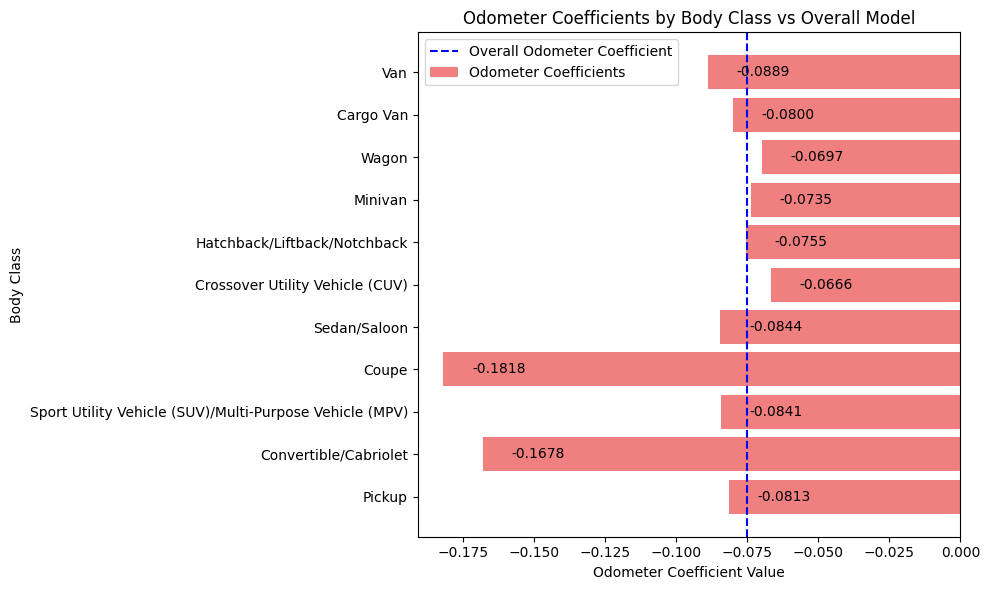

In [294]:
import matplotlib.pyplot as plt
import numpy as np

# Prepare data for plotting
body_class_names = list(body_class_results.keys())
odometer_coeffs = [results['coefficients'][1] for results in body_class_results.values()]

# Include overall model coefficient for odometer
overall_odometer_coef = overall_coefficients[1]

# Create a horizontal bar plot for comparison
plt.figure(figsize=(10, 6))

# Create horizontal bar plot for odometer coefficients
bars = plt.barh(body_class_names, odometer_coeffs, label='Odometer Coefficients', color='lightcoral')

# Add overall model coefficient as a vertical line
plt.axvline(x=overall_odometer_coef, color='blue', linestyle='--', label='Overall Odometer Coefficient')

# Add labels and title
plt.title('Odometer Coefficients by Body Class vs Overall Model')
plt.xlabel('Odometer Coefficient Value')
plt.ylabel('Body Class')

# Label each bar with its value
for bar in bars:
    plt.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2, 
             f'{bar.get_width():.4f}', va='center')

# Add legend
plt.legend()

plt.tight_layout()
plt.show()


In [296]:
overall_coefficients

array([ 9.15252963e+02, -7.50875042e-02])

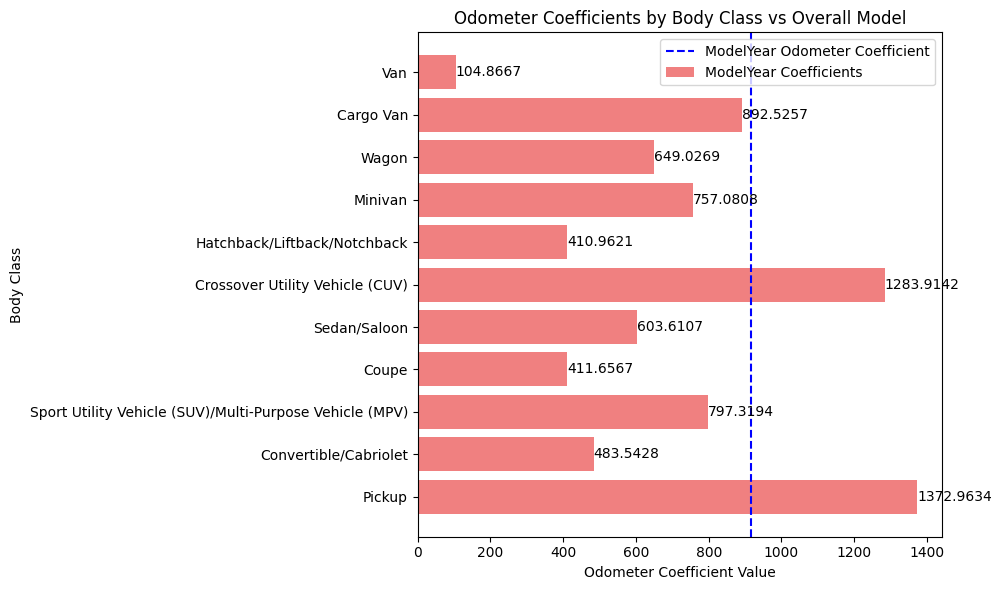

In [297]:
import matplotlib.pyplot as plt
import numpy as np

# Prepare data for plotting
body_class_names = list(body_class_results.keys())
odometer_coeffs = [results['coefficients'][1] for results in body_class_results.values()]

# Include overall model coefficient for odometer
modelyear_odometer_coef = overall_coefficients[0]

# Create a horizontal bar plot for comparison
plt.figure(figsize=(10, 6))

# Create horizontal bar plot for odometer coefficients
bars = plt.barh(body_class_names, modelyear_coeffs, label='ModelYear Coefficients', color='lightcoral')

# Add overall model coefficient as a vertical line
plt.axvline(x=modelyear_odometer_coef, color='blue', linestyle='--', label='ModelYear Odometer Coefficient')

# Add labels and title
plt.title('Odometer Coefficients by Body Class vs Overall Model')
plt.xlabel('Odometer Coefficient Value')
plt.ylabel('Body Class')

# Label each bar with its value
for bar in bars:
    plt.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2, 
             f'{bar.get_width():.4f}', va='center')

# Add legend
plt.legend()

plt.tight_layout()
plt.show()


In [298]:
import matplotlib.pyplot as plt
import numpy as np

# Prepare data for plotting
body_class_names = list(body_class_results.keys())
odometer_coeffs = [results['coefficients'][1] for results in body_class_results.values()]
odometer_pvalues = [results['p_values'][1] for results in body_class_results.values()]  # Assuming p-values are stored here

# Include overall model coefficient for odometer
overall_odometer_coef = overall_coefficients[1]
overall_odometer_pvalue = overall_p_values[1]  # Assuming overall p-values are stored similarly

# Create a horizontal bar plot for comparison
plt.figure(figsize=(10, 6))

# Create horizontal bar plot for odometer coefficients
bars = plt.barh(body_class_names, odometer_coeffs, label='Odometer Coefficients', color='lightcoral')

# Add overall model coefficient as a vertical line
plt.axvline(x=overall_odometer_coef, color='blue', linestyle='--', label='Overall Odometer Coefficient')

# Add labels and title
plt.title('Odometer Coefficients by Body Class vs Overall Model')
plt.xlabel('Odometer Coefficient Value')
plt.ylabel('Body Class')

# Label each bar with its value and p-value
for bar, pval in zip(bars, odometer_pvalues):
    plt.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2, 
             f'{bar.get_width():.2f} (p={pval:.3f})', va='center')

# Add legend
plt.legend()

plt.tight_layout()
plt.show()


KeyError: 'p_values'

In [300]:
import pandas as pd
import statsmodels.api as sm

# Dictionary to store results
body_class_results = {}

# Loop through each unique body class
for bc in df17['BodyClass'].unique():
    t_df = df17[df17['BodyClass'] == bc]
    
    # Prepare the data for regression (excluding price)
    X = t_df[['ModelYear', 'odometer']]
    X = sm.add_constant(X)  # Add a constant term for the intercept
    y = t_df['price']
    
    # Fit the model
    model = sm.OLS(y, X).fit()
    
    # Store coefficients and p-values
    body_class_results[bc] = {
        'coefficients': model.params,
        'p_values': model.pvalues
    }

# Example of extracting overall model (optional)
overall_model = sm.OLS(df17['price'], sm.add_constant(df17[['ModelYear', 'odometer', 'Doors', 'EngineCylinders']])).fit()
overall_coefficients = overall_model.params
overall_p_values = overall_model.pvalues

# Example output
print(body_class_results)


{'Pickup': {'coefficients': const       -2.726347e+06
ModelYear    1.372963e+03
odometer    -8.133260e-02
dtype: float64, 'p_values': const        0.0
ModelYear    0.0
odometer     0.0
dtype: float64}, 'Convertible/Cabriolet': {'coefficients': const       -939603.274455
ModelYear       483.542768
odometer         -0.167814
dtype: float64, 'p_values': const         1.568656e-30
ModelYear     1.534532e-32
odometer     9.313059e-127
dtype: float64}, 'Sport Utility Vehicle (SUV)/Multi-Purpose Vehicle (MPV)': {'coefficients': const       -1.578584e+06
ModelYear    7.973194e+02
odometer    -8.405105e-02
dtype: float64, 'p_values': const        0.0
ModelYear    0.0
odometer     0.0
dtype: float64}, 'Coupe': {'coefficients': const       -793146.312047
ModelYear       411.656699
odometer         -0.181756
dtype: float64, 'p_values': const         2.583007e-28
ModelYear     8.739436e-31
odometer     4.726205e-251
dtype: float64}, 'Sedan/Saloon': {'coefficients': const       -1.193658e+06
ModelYe

In [ ]:
mean_large = np.mean(large_sample)
mean_subsample = np.mean(subsample)

# Perform a t-test comparing the subsample mean to the larger sample mean
t_statistic, p_value = stats.ttest_1samp(subsample, mean_large)

In [302]:
df17.BodyClass.unique()

array(['Pickup', 'Convertible/Cabriolet',
       'Sport Utility Vehicle (SUV)/Multi-Purpose Vehicle (MPV)', 'Coupe',
       'Sedan/Saloon', 'Crossover Utility Vehicle (CUV)',
       'Hatchback/Liftback/Notchback', 'Minivan', 'Wagon', 'Cargo Van',
       'Van'], dtype=object)

In [288]:
dict(zip(features, overall_coefficients))

{'ModelYear': 915.252962547954, 'odometer': -0.075087504191322}

In [304]:
import pandas as pd
import statsmodels.api as sm
import scipy.stats as stats

# Fit overall model using ModelYear and odometer
overall_model = sm.OLS(df17['price'], sm.add_constant(df17[['ModelYear', 'odometer']])).fit()

# Extract overall coefficients and standard errors
overall_coefs = overall_model.params
overall_se = overall_model.bse

# Prepare a dictionary to store results for each body class
results = {}

# Loop through each unique body class
for bc in df17['BodyClass'].unique():
    # Filter the DataFrame for the current body class (subsample)
    subsample = df17[df17['BodyClass'] == bc]
    
    if len(subsample) > 1:  # Ensure there are enough data points
        # Fit model for the subsample
        subsample_model = sm.OLS(subsample['price'], sm.add_constant(subsample[['ModelYear', 'odometer']])).fit()

        # Extract coefficients and standard errors for the subsample
        subsample_coefs = subsample_model.params
        subsample_se = subsample_model.bse

        # Calculate t-statistics for ModelYear and odometer
        t_stats = {}
        p_values = {}

        for variable in ['ModelYear', 'odometer']:
            t_stat = (subsample_coefs[variable] - overall_coefs[variable]) / subsample_se[variable]
            # Calculate degrees of freedom
            df = len(subsample) - 1
            # Calculate two-tailed p-value
            p_value = 2 * (1 - stats.t.cdf(np.abs(t_stat), df))

            # Store results
            t_stats[variable] = t_stat
            p_values[variable] = p_value

        results[bc] = {
            'subsample_coef': subsample_coefs[['ModelYear', 'odometer']],
            't_stat': t_stats,
            'p_value': p_values
        }

# Display results
for body_class, result in results.items():
    print(f"Body Class: {body_class}")
    print(f"Subsample Coefficients:\n{result['subsample_coef']}")
    print(f"T-Statistics: {result['t_stat']}")
    print(f"P-Values: {result['p_value']}\n")


Body Class: Pickup
Subsample Coefficients:
ModelYear    1372.963437
odometer       -0.081333
dtype: float64
T-Statistics: {'ModelYear': 22.795498114973796, 'odometer': -3.5365880724944585}
P-Values: {'ModelYear': 0.0, 'odometer': 0.00040634180377940865}

Body Class: Convertible/Cabriolet
Subsample Coefficients:
ModelYear    483.542768
odometer      -0.167814
dtype: float64
T-Statistics: {'ModelYear': -10.835540340048814, 'odometer': -14.462741775378952}
P-Values: {'ModelYear': 0.0, 'odometer': 0.0}

Body Class: Sport Utility Vehicle (SUV)/Multi-Purpose Vehicle (MPV)
Subsample Coefficients:
ModelYear    797.319360
odometer      -0.084051
dtype: float64
T-Statistics: {'ModelYear': -7.908844858991203, 'odometer': -6.783318782306013}
P-Values: {'ModelYear': 2.6645352591003757e-15, 'odometer': 1.1961320822706512e-11}

Body Class: Coupe
Subsample Coefficients:
ModelYear    411.656699
odometer      -0.181756
dtype: float64
T-Statistics: {'ModelYear': -14.251681240650877, 'odometer': -21.65348

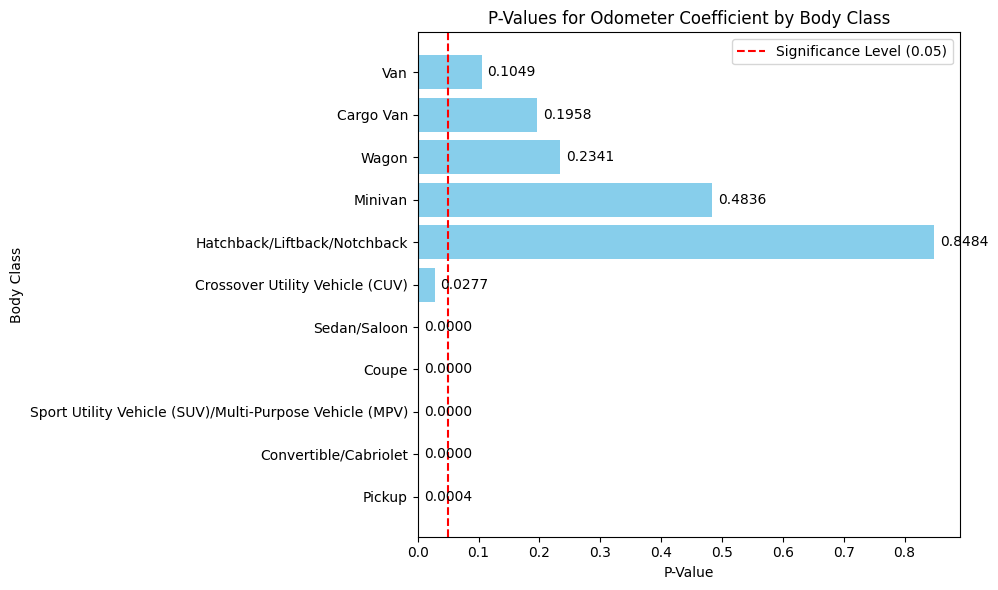

In [305]:
import matplotlib.pyplot as plt

# Prepare data for plotting
body_classes = list(results.keys())
p_values_odometer = [result['p_value']['odometer'] for result in results.values()]

# Create a horizontal bar plot for p-values
plt.figure(figsize=(10, 6))
plt.barh(body_classes, p_values_odometer, color='skyblue')
plt.axvline(x=0.05, color='red', linestyle='--', label='Significance Level (0.05)')

# Add titles and labels
plt.title('P-Values for Odometer Coefficient by Body Class')
plt.xlabel('P-Value')
plt.ylabel('Body Class')
plt.legend()

# Annotate each bar with the p-value
for index, value in enumerate(p_values_odometer):
    plt.text(value + 0.01, index, f'{value:.4f}', va='center')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


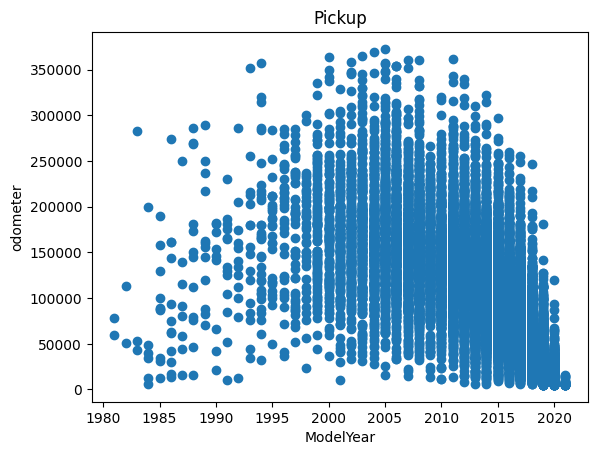

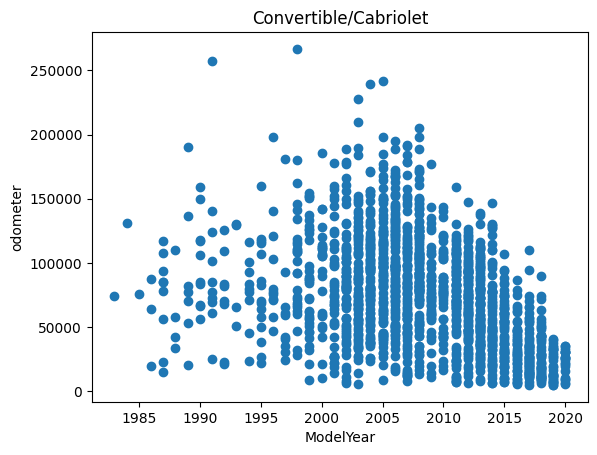

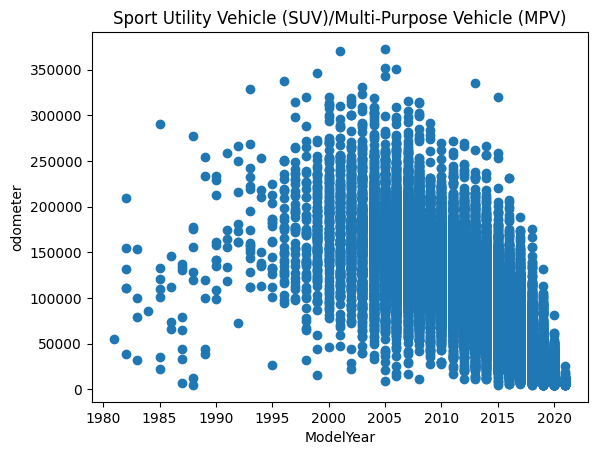

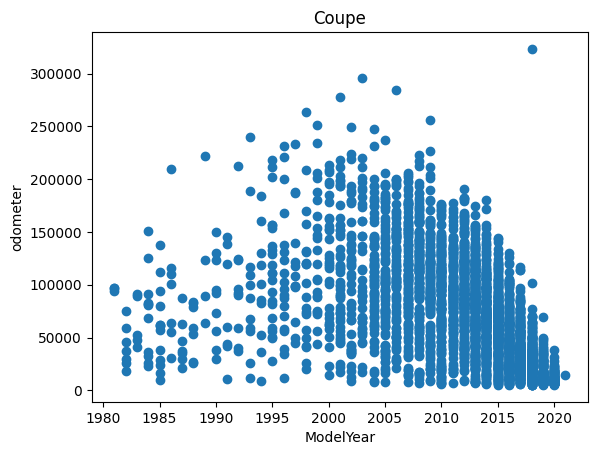

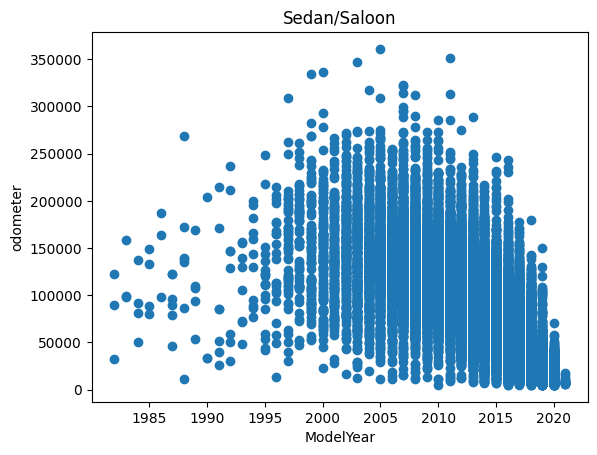

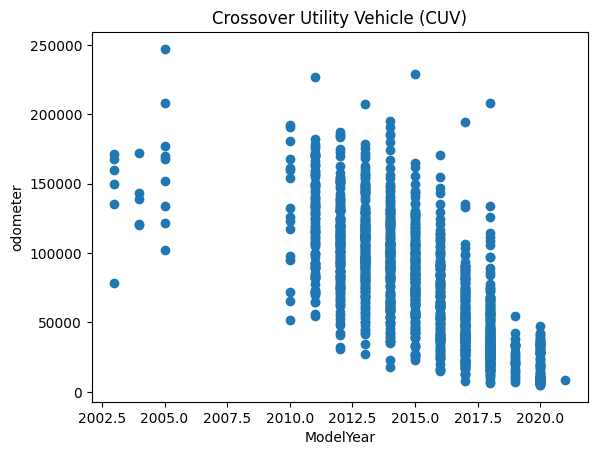

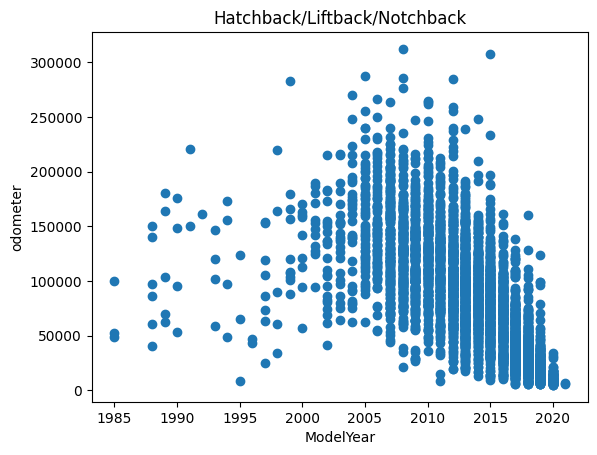

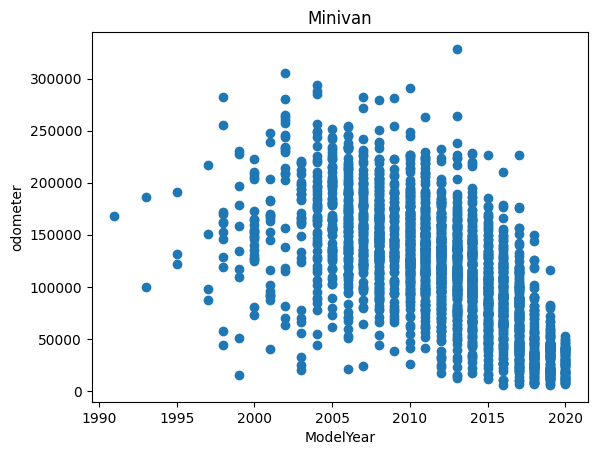

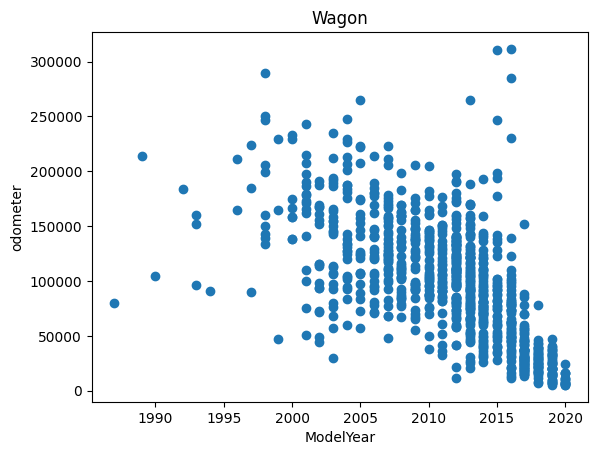

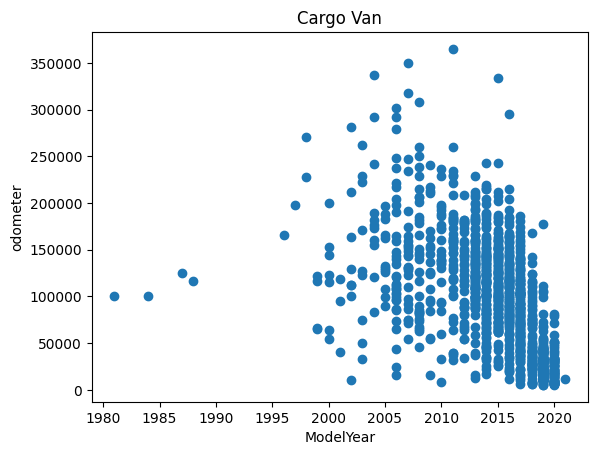

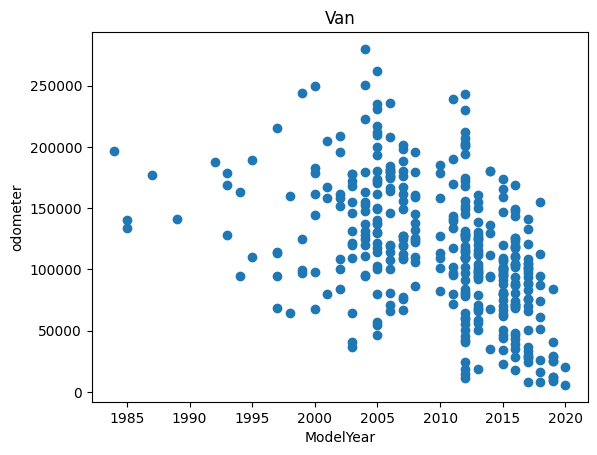

{'Pickup': -0.6362863973184284,
 'Convertible/Cabriolet': -0.37871451284632873,
 'Sport Utility Vehicle (SUV)/Multi-Purpose Vehicle (MPV)': -0.757233378348977,
 'Coupe': -0.4324601814441271,
 'Sedan/Saloon': -0.6603383631865772,
 'Crossover Utility Vehicle (CUV)': -0.7098094789326242,
 'Hatchback/Liftback/Notchback': -0.6322426120261236,
 'Minivan': -0.6337505804562008,
 'Wagon': -0.6425012643927512,
 'Cargo Van': -0.5441596075652364,
 'Van': -0.47144065199457236}

In [277]:
corr_res = {}

for bc in df17.BodyClass.unique():
    t_df = df17[df17.BodyClass==bc]
    corr_res[bc] = t_df['odometer'].corr(t_df['ModelYear'])
    plt.scatter(t_df['ModelYear'], t_df['odometer'])
    plt.title(bc)
    plt.xlabel('ModelYear')
    plt.ylabel('odometer')
    plt.show()
corr_res

In [307]:
# 2021 Median state income source: https://www.statista.com/statistics/236804/median-family-income-in-the-united-states-by-state/

data_dict = {'wy' : 86552, 'wi' : 59787, 'wv' : 48418, 'wa' : 73755, 'vt' : 61748, 'va' : 66190, 'ut' : 56000, 'tx' : 59802, 'tn' : 56616,
    'sd' : 64405, 'sc' : 52441, 'ri' : 64296, 'pa' : 64042, 'or' : 61449, 'ok' : 53808, 'oh' : 56995, 'ny' : 76753, 'nv' : 60167, 'nm' : 50292,
    'nj' : 77009, 'nh' : 73279, 'ne' : 61210, 'nd' : 64276, 'nc' : 56095, 'mt' : 56848, 'ms' : 45887, 'mo' : 55310, 'ak' : 65677, 'al' : 49671,
    'ar' : 50588, 'az' : 55574, 'ca' : 76800, 'co' : 70715, 'ct' : 82885, 'dc' : 96659, 'de' : 59846, 'fl' : 62136, 'ga' : 55846, 'hi' : 60711,
    'ia' : 57080, 'id' : 52276, 'il' : 67165, 'in' : 56435, 'ks' : 58857, 'ky' : 51298, 'la' : 54181, 'ma' : 83593, 'md' : 69710, 'me' : 58272,
    'mi' : 45887, 'mn' : 66232}

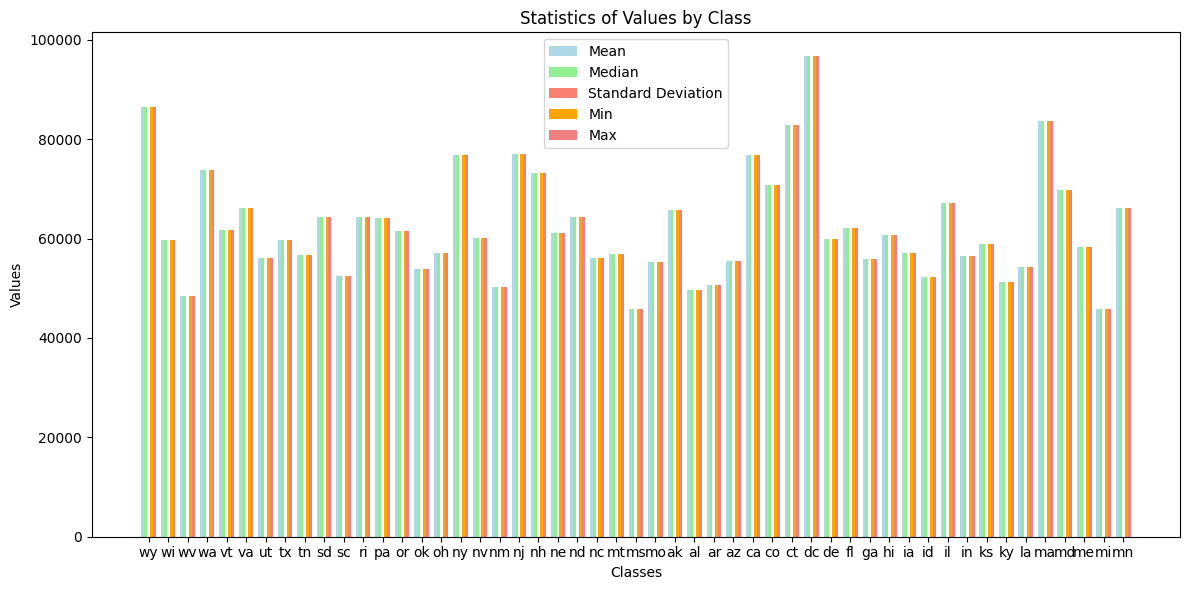

In [316]:
state_income_df = pd.DataFrame.from_dict(state_income_map, orient='index', columns=['income'])
state_income_df.describe()

income
count     51.000000
mean   62186.745098
std    10761.046042
min    45887.000000
25%    55710.000000
50%    59846.000000
75%    66211.000000
max    96659.000000

Text(0, 0.5, 'income')

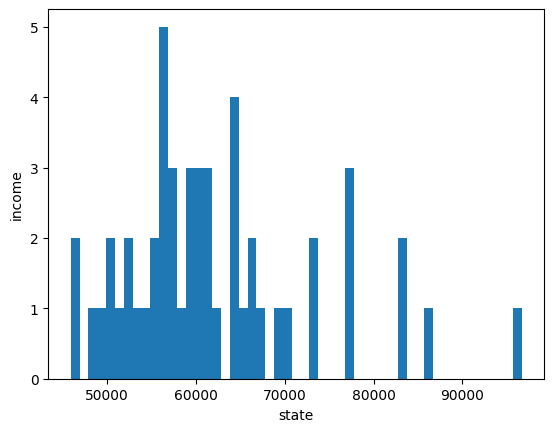

In [324]:
plt.hist(state_income_df,bins=51)
plt.xlabel('state')
plt.ylabel('income')

In [326]:
cat_feats2 = cat_feats + ['BodyClass

['Turbo',
 'BodyClass',
 'FuelTypePrimary',
 'EngineCylinders',
 'VehicleType',
 'DriveType',
 'GVWR',
 'Doors',
 'paint_color']

In [328]:
num_feats = ['odometer','ModelYear', 'displ']

In [337]:
df17[num_feats+cat_feats+['price']].isnull().sum()

odometer           0
ModelYear          0
displ              0
Turbo              0
BodyClass          0
FuelTypePrimary    0
EngineCylinders    0
VehicleType        0
DriveType          0
GVWR               0
Doors              0
paint_color        0
price              0
dtype: int64

In [334]:
df_dummies = pd.get_dummies(df17[cat_feats], drop_first=True)

# Combine the dummy variables with numerical features
X = pd.concat([df17[num_feats], df_dummies], axis=1)
y = df17['price']  # Target variable

# Add a constant for the intercept
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression
print(model.summary())

# Extract coefficients as feature importance
feature_importance = model.params[1:]  # Exclude the intercept
feature_importance = feature_importance.sort_values(ascending=False)

# Plotting feature importances
plt.figure(figsize=(10, 6))
feature_importance.plot(kind='bar', color='skyblue')
plt.title('Feature Importances from Linear Regression')
plt.ylabel('Coefficient Value')
plt.xticks(rotation=45)
plt.axhline(0, color='red', linestyle='--')  # Add a line at y=0
plt.show()

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

Model R^2 Score: 0.71377842601044


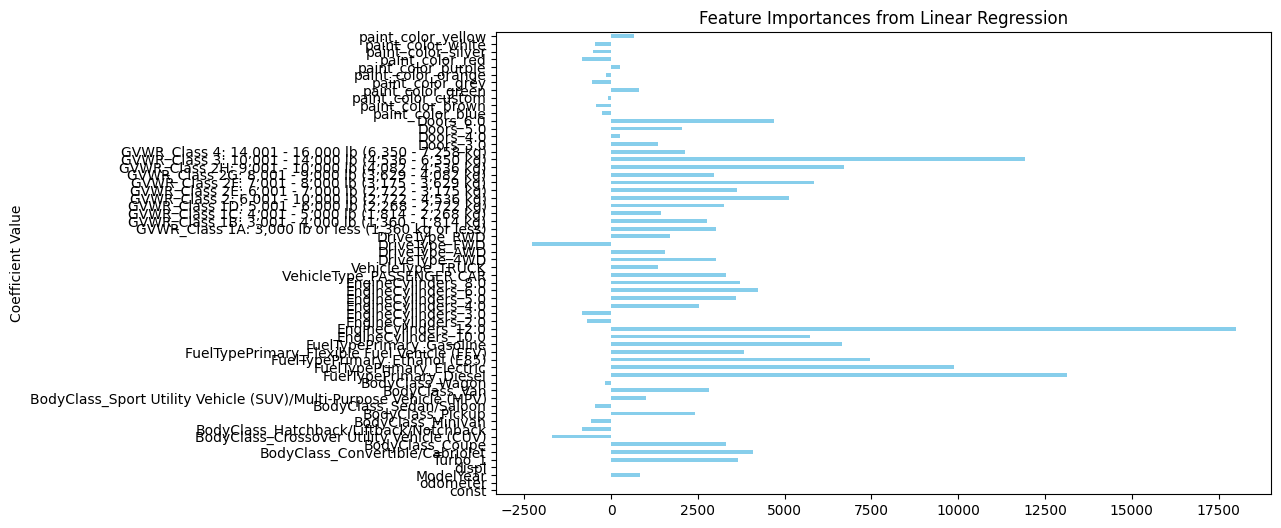

In [367]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


model = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)

# Get the coefficients (feature importances)
feature_importance = pd.Series(model.coef_, index=X.columns)

# Print the model's score
print("Model R^2 Score:", model.score(X, y))

# Plotting feature importances
plt.figure(figsize=(10, 6))
feature_importance.plot(kind='barh', color='skyblue')
plt.title('Feature Importances from Linear Regression')
plt.ylabel('Coefficient Value')
plt.show()

In [387]:
coef_df

Coefficient
Feature                                                        
odometer                                              -0.227434
DriveType_FWD                                         -0.015295
BodyClass_Crossover Utility Vehicle (CUV)             -0.011282
EngineCylinders_3.0                                   -0.005668
paint_color_red                                       -0.005645
BodyClass_Hatchback/Liftback/Notchback                -0.005644
EngineCylinders_2.0                                   -0.004621
BodyClass_Minivan                                     -0.003937
paint_color_grey                                      -0.003756
paint_color_silver                                    -0.003379
paint_color_white                                     -0.003182
BodyClass_Sedan/Saloon                                -0.003070
paint_color_brown                                     -0.002807
paint_color_blue                                      -0.001655
BodyClass_Wagon                                       -0.001256
paint_color_orange                                    -0.001000
paint_color_custom                                    -0.000518
paint_color_purple                                     0.001700
Doors_4.0                                              0.001784
paint_color_yellow                                     0.004420
paint_color_green                                      0.005310
BodyClass_Sport Utility Vehicle (SUV)/Multi-Pur...     0.006723
VehicleType_TRUCK                                      0.008958
Doors_3.0                                              0.009124
GVWR_Class 1C: 4,001 - 5,000 lb (1,814 - 2,268 kg)     0.009718
DriveType_AWD                                          0.010410
DriveType_RWD                                          0.011288
Doors_5.0                                              0.013728
GVWR_Class 4: 14,001 - 16,000 lb (6,350 - 7,258...     0.014280
BodyClass_Pickup                                       0.016155
EngineCylinders_4.0                                    0.017014
GVWR_Class 1B: 3,001 - 4,000 lb (1,360 - 1,814 kg)     0.018398
BodyClass_Van                                          0.018837
GVWR_Class 2G: 8,001 - 9,000 lb (3,629 - 4,082 kg)     0.019839
GVWR_Class 1A: 3,000 lb or less (1,360 kg or less)     0.020205
DriveType_4WD                                          0.020213
GVWR_Class 1D: 5,001 - 6,000 lb (2,268 - 2,722 kg)     0.021731
BodyClass_Coupe                                        0.022102
VehicleType_PASSENGER CAR                              0.022162
EngineCylinders_5.0                                    0.024129
GVWR_Class 2E: 6,001 - 7,000 lb (2,722 - 3,175 kg)     0.024278
Turbo_1                                                0.024374
EngineCylinders_8.0                                    0.024778
FuelTypePrimary_Flexible Fuel Vehicle (FFV)            0.025670
BodyClass_Convertible/Cabriolet                        0.027289
EngineCylinders_6.0                                    0.028274
Doors_6.0                                              0.031322
GVWR_Class 2: 6,001 - 10,000 lb (2,722 - 4,536 kg)     0.034253
EngineCylinders_10.0                                   0.038257
GVWR_Class 2F: 7,001 - 8,000 lb (3,175 - 3,629 kg)     0.039043
FuelTypePrimary_Gasoline                               0.044532
GVWR_Class 2H: 9,001 - 10,000 lb (4,082 - 4,536...     0.044794
FuelTypePrimary_Ethanol (E85)                          0.049988
FuelTypePrimary_Electric                               0.066127
GVWR_Class 3: 10,001 - 14,000 lb (4,536 - 6,350...     0.079801
FuelTypePrimary_Diesel                                 0.087873
displ                                                  0.119514
EngineCylinders_12.0                                   0.120439
ModelYear                                              0.224856

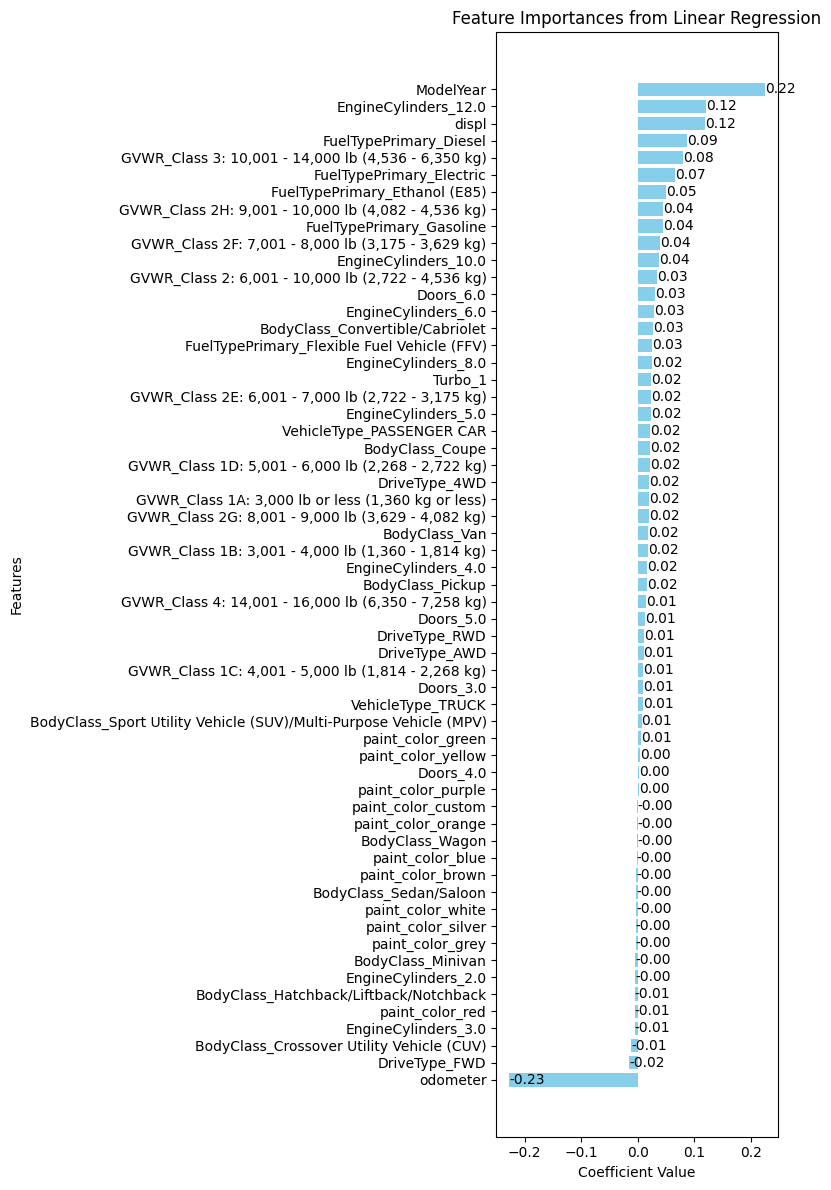

In [390]:
#importance_df = pd.DataFrame(feature_importance, columns=['importance']).drop('const')

# Sort values
coef_df = coef_df.sort_values(by='Coefficient')

# Set the figure size
plt.figure(figsize=(8, 12))

# Create the horizontal bar plot
plt.barh(coef_df.index, coef_df['Coefficient'], color='skyblue')

# Set titles and labels
plt.title('Feature Importances from Linear Regression')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')

# Annotate bar sizes
for index, value in enumerate(coef_df['Coefficient']):
    plt.text(value, index, f'{value:.2f}', va='center')

# Show the plot with adjusted layout
plt.tight_layout()
plt.show()

RMSE: 7345.744634242976
                                              Feature  Coefficient
0                                           Intercept    -0.156418
1                                            odometer    -0.227434
2                                           ModelYear     0.224856
3                                               displ     0.119514
4                                             Turbo_1     0.024374
5                     BodyClass_Convertible/Cabriolet     0.027289
6                                     BodyClass_Coupe     0.022102
7           BodyClass_Crossover Utility Vehicle (CUV)    -0.011282
8              BodyClass_Hatchback/Liftback/Notchback    -0.005644
9                                   BodyClass_Minivan    -0.003937
10                                   BodyClass_Pickup     0.016155
11                             BodyClass_Sedan/Saloon    -0.003070
12  BodyClass_Sport Utility Vehicle (SUV)/Multi-Pu...     0.006723
13                                    

<Figure size 1000x600 with 0 Axes>

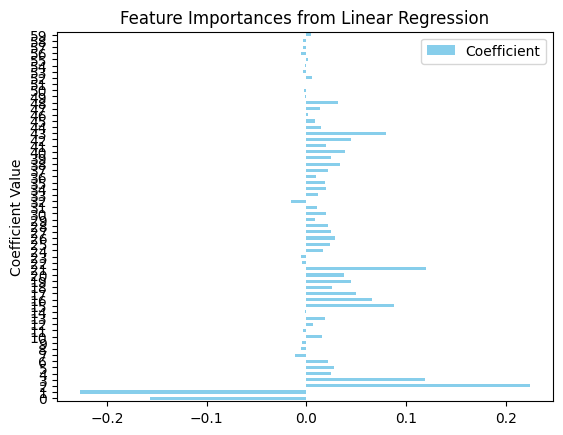

In [391]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

df_dummies = pd.get_dummies(df17[cat_feats], drop_first=True)

X = pd.concat([df17[num_feats], df_dummies], axis=1)
y = df17['price']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features and target using MinMaxScaler
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

# Fit the scaler only on the training data
X_train_scaled = scaler_X.fit_transform(X_train)
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))

# Transform the test data
X_test_scaled = scaler_X.transform(X_test)
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))


model.fit(X_train_scaled, y_train_scaled)

y_pred_scaled = model.predict(X_test_scaled)

# Inverse transform the predictions to the original scale
y_pred = scaler_y.inverse_transform(y_pred_scaled)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)

coefficients = model.coef_.flatten()  # Flatten to 1D array if needed
intercept = model.intercept_[0]  # Intercept term

# Create a DataFrame to display feature names with their coefficients
feature_names = X.columns  # Get feature names from original DataFrame
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Display the intercept as well
intercept_df = pd.DataFrame({'Feature': ['Intercept'], 'Coefficient': [intercept]})
coef_df = pd.concat([intercept_df, coef_df], ignore_index=True)

# Display the coefficients DataFrame
print(coef_df)

# Plotting feature importances
plt.figure(figsize=(10, 6))
coef_df.plot(kind='barh', color='skyblue')
plt.title('Feature Importances from Linear Regression')
plt.ylabel('Coefficient Value')
plt.show()

In [270]:
df17.price.corr(df17.odometer)

-0.5404182249326477

Text(0.5, 1.0, 'Cheap Cars (< $2500): Model Year')

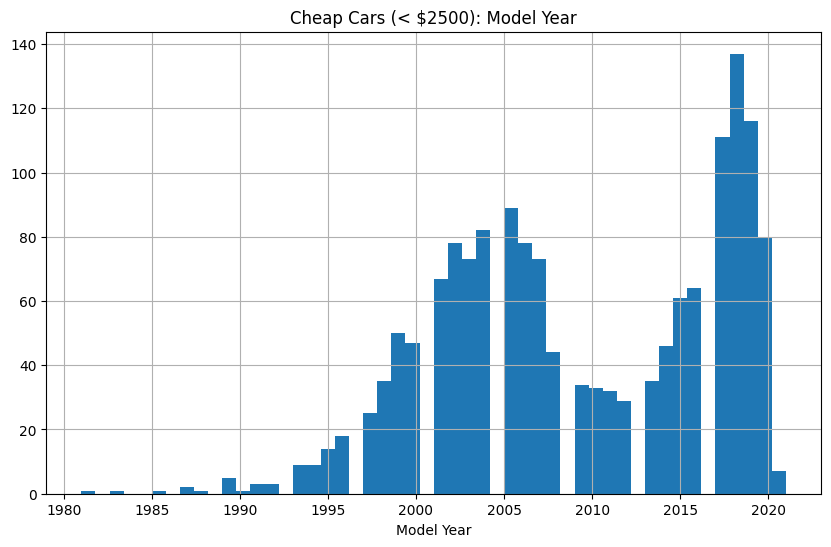

In [109]:
df_t = df17[df17.price < 2500]

plt.figure(figsize=(10, 6))
df_t.ModelYear.hist(bins=50)
plt.xlabel('Model Year')
#plt.ylabel('price')










{'Pickup': 0.6645671630685019,
 'Convertible/Cabriolet': 0.44112814124175426,
 'Sport Utility Vehicle (SUV)/Multi-Purpose Vehicle (MPV)': 0.6437876913255052,
 'Coupe': 0.40522207337710586,
 'Sedan/Saloon': 0.6179199830122393,
 'Crossover Utility Vehicle (CUV)': 0.7510813921452899,
 'Hatchback/Liftback/Notchback': 0.5805906587062357,
 'Minivan': 0.7374352251815435,
 'Wagon': 0.6790294164900557,
 'Cargo Van': 0.650680267959511,
 'Van': 0.3144839865192551}
df17.price.corr(df17.odometer)
-0.5404182249326477
Selection deleted

plt.title('Cheap Cars (< $2500): Model Year')

Text(0.5, 0, 'ModelYear')

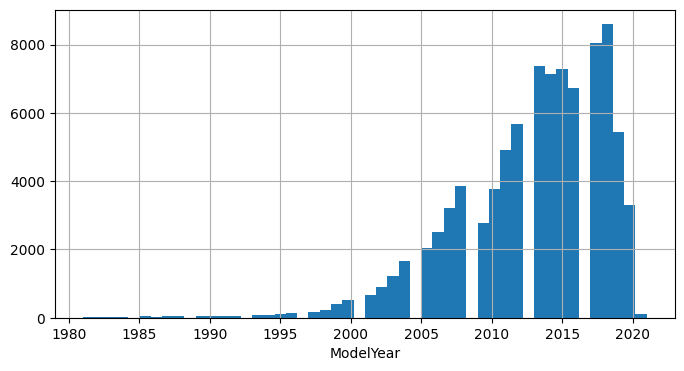

In [114]:
plt.figure(figsize=(8,4))
df17.ModelYear.hist(bins=50)
plt.xlabel('ModelYear')

In [221]:
good_cats

['ABS',
 'AdaptiveCruiseControl',
 'AdaptiveDrivingBeam',
 'AirBagLocCurtain',
 'AirBagLocFront',
 'AirBagLocKnee',
 'AirBagLocSeatCushion',
 'AirBagLocSide',
 'AutoReverseSystem',
 'BedType',
 'BlindSpotMon',
 'BodyCabType',
 'BodyClass',
 'BrakeSystemType',
 'CAN_AACN',
 'CIB',
 'DaytimeRunningLight',
 'Doors',
 'DriveType',
 'DynamicBrakeSupport',
 'ESC',
 'ElectrificationLevel',
 'EngineConfiguration',
 'EngineCylinders',
 'ForwardCollisionWarning',
 'FuelInjectionType',
 'FuelTypePrimary',
 'FuelTypeSecondary',
 'GVWR',
 'KeylessIgnition',
 'LaneDepartureWarning',
 'LaneKeepSystem',
 'LowerBeamHeadlampLightSource',
 'Make',
 'ParkAssist',
 'PedestrianAutomaticEmergencyBraking',
 'Pretensioner',
 'RearCrossTrafficAlert',
 'RearVisibilitySystem',
 'SeatBeltsAll',
 'SeatRows',
 'Seats',
 'SemiautomaticHeadlampBeamSwitching',
 'SteeringLocation',
 'TPMS',
 'TractionControl',
 'TransmissionSpeeds',
 'TransmissionStyle',
 'Turbo',
 'ValveTrainDesign',
 'VehicleType',
 'WheelBaseType',
 

In [253]:
vin_ex = {k:v for (k,v) in df17[good_cats].isnull().sum().to_dict().items() if (v > 15000) & (k not in ['BodyCabType','condition'])}

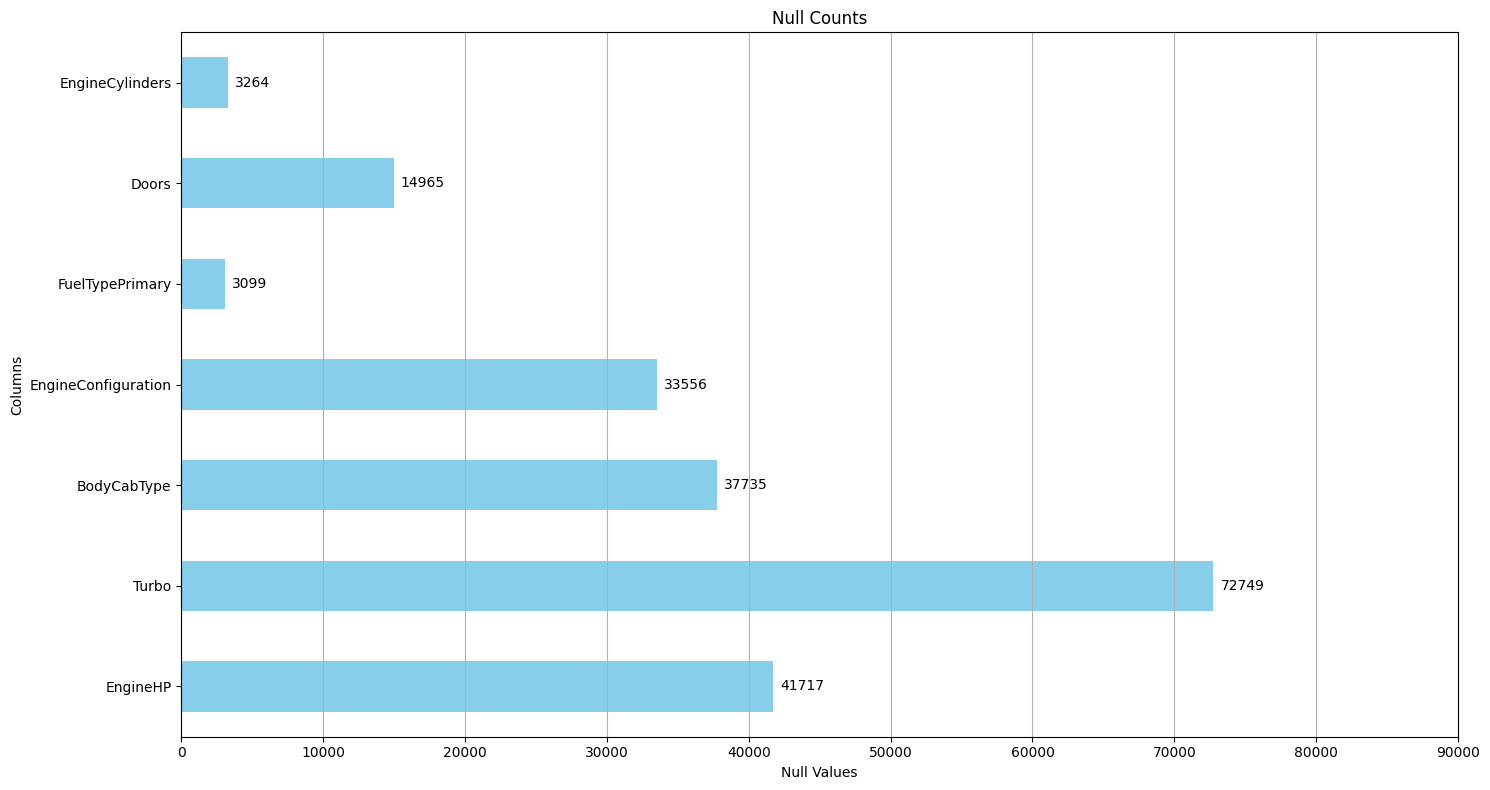

In [261]:
null_counts = df7[['EngineHP', 'Turbo','BodyCabType','EngineConfiguration','FuelTypePrimary','Doors','EngineCylinders']].isnull().sum()

# Create a horizontal bar graph
plt.figure(figsize=(15, 8))
ax = null_counts.plot(kind='barh', color='skyblue')

# Add titles and labels
plt.title('Null Counts')
plt.xlabel('Null Values')
plt.ylabel('Columns')

# Annotate each bar with the height
for index, value in enumerate(null_counts):
    ax.text(value + 500, index, str(value), va='center')  # Adjust position for better visibility
plt.xlim([000,90000])
# Show the plot
plt.grid(axis='x')
plt.tight_layout()
#plt.savefig('null_counts_horizontal_bar.png') 
plt.show()
#plt.savefig('null_counts_horizontal_bar.png') # You can specify the file format in the filename (e.g., .png, .jpg, .pdf)

In [54]:
df7[df7.Model.str.contains('Sierra')]['Model'].unique()

array(['Sierra', 'Sierra Limited', 'Sierra HD'], dtype=object)

In [57]:
df7.Model.unique().size

878

In [35]:
chk_nulls = ['Doors',
'DriveType',
'EngineCylinders',
'FuelTypePrimary',
'GVWR',
'DisplacementCC',
'BodyCabType',
'EngineHP',
'EngineConfiguration']


In [139]:
df17.BodyClass.unique()

array(['Pickup', 'Convertible/Cabriolet',
       'Sport Utility Vehicle (SUV)/Multi-Purpose Vehicle (MPV)', 'Coupe',
       'Sedan/Saloon', 'Crossover Utility Vehicle (CUV)',
       'Hatchback/Liftback/Notchback', 'Minivan', 'Wagon', 'Cargo Van',
       'Van'], dtype=object)

In [141]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr

# Sample DataFrame creation (replace this with your actual DataFrame)
# df17 = pd.read_csv('your_data.csv')

# Define the body classes of interest
body_classes = df17.BodyClass.unique()

# Function to perform Fisher transformation
def fisher_transformation(r):
    return 0.5 * np.log((1 + r) / (1 - r))

# Dictionary to store results
results = {}

# Loop through each body class
for bodyclass in body_classes:
    # Filter the DataFrame for the current body class
    subset = df17[df17['BodyClass'].str.lower() == bodyclass]
    
    # Check if there are enough data points
    if len(subset) > 1:  # At least 2 points required to compute correlation
        # Calculate the Pearson correlation coefficient
        r, _ = pearsonr(subset['price'], subset['odometer'])
        
        # Apply Fisher transformation
        fisher_r = fisher_transformation(r)
        
        # Store the results
        results[bodyclass] = {
            'correlation': r,
            'fisher_transformation': fisher_r
        }
    else:
        results[bodyclass] = {
            'correlation': None,
            'fisher_transformation': None
        }

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results).T
print(results_df)


                                                   correlation  \
Pickup                                                    None   
Convertible/Cabriolet                                     None   
Sport Utility Vehicle (SUV)/Multi-Purpose Vehic...        None   
Coupe                                                     None   
Sedan/Saloon                                              None   
Crossover Utility Vehicle (CUV)                           None   
Hatchback/Liftback/Notchback                              None   
Minivan                                                   None   
Wagon                                                     None   
Cargo Van                                                 None   
Van                                                       None   

                                                   fisher_transformation  
Pickup                                                              None  
Convertible/Cabriolet                                    

In [142]:
results

{'Pickup': {'correlation': None, 'fisher_transformation': None},
 'Convertible/Cabriolet': {'correlation': None, 'fisher_transformation': None},
 'Sport Utility Vehicle (SUV)/Multi-Purpose Vehicle (MPV)': {'correlation': None,
  'fisher_transformation': None},
 'Coupe': {'correlation': None, 'fisher_transformation': None},
 'Sedan/Saloon': {'correlation': None, 'fisher_transformation': None},
 'Crossover Utility Vehicle (CUV)': {'correlation': None,
  'fisher_transformation': None},
 'Hatchback/Liftback/Notchback': {'correlation': None,
  'fisher_transformation': None},
 'Minivan': {'correlation': None, 'fisher_transformation': None},
 'Wagon': {'correlation': None, 'fisher_transformation': None},
 'Cargo Van': {'correlation': None, 'fisher_transformation': None},
 'Van': {'correlation': None, 'fisher_transformation': None}}

In [210]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr

# Sample DataFrame creation (replace this with your actual DataFrame)
# df17 = pd.read_csv('your_data.csv')

# Check unique body classes in the DataFrame
unique_body_classes = df_scaled['BodyClass'].unique()
print("Unique Body Classes:", unique_body_classes)

# Define the body classes of interest based on your DataFrame
body_classes = [
    'Pickup', 
    'Convertible/Cabriolet', 
    'Sport Utility Vehicle (SUV)/Multi-Purpose Vehicle (MPV)', 
    'Coupe', 
    'Sedan/Saloon', 
    'Crossover Utility Vehicle (CUV)', 
    'Hatchback/Liftback/Notchback', 
    'Minivan', 
    'Wagon', 
    'Cargo Van', 
    'Van'
]

# Function to perform Fisher transformation
def fisher_transformation(r):
    if r == 1:
        return np.inf  # Handle perfect correlation
    elif r == -1:
        return -np.inf  # Handle perfect inverse correlation
    return 0.5 * np.log((1 + r) / (1 - r))

# Dictionary to store results
results = {bodyclass: {'correlation': None, 'fisher_transformation': None} for bodyclass in body_classes}

# Loop through each body class
for bodyclass in body_classes:
    # Filter the DataFrame for the current body class (case-insensitive)
    subset = df_scaled[df_scaled['BodyClass'].str.lower() == bodyclass.lower()]
    
    # Check if there are enough data points
    if len(subset) > 1:  # At least 2 points required to compute correlation
        # Calculate the Pearson correlation coefficient
        r, _ = pearsonr(subset['price'], subset['odometer'])
        
        # Apply Fisher transformation
        fisher_r = fisher_transformation(r)
        
        # Store the results
        results[bodyclass] = {
            'correlation': r,
            'fisher_transformation': fisher_r,
            'data_percent' : str(round((len(subset)/len(df17))*100,2))+'%'
        }

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results).T

Unique Body Classes: ['Pickup' 'Convertible/Cabriolet'
 'Sport Utility Vehicle (SUV)/Multi-Purpose Vehicle (MPV)' 'Coupe'
 'Sedan/Saloon' 'Crossover Utility Vehicle (CUV)'
 'Hatchback/Liftback/Notchback' 'Minivan' 'Wagon' 'Cargo Van' 'Van']


In [211]:
results_df.sort_values(by='fisher_transformation')

correlation  \
Minivan                                              -0.757538   
Crossover Utility Vehicle (CUV)                      -0.722025   
Wagon                                                -0.690063   
Cargo Van                                             -0.68067   
Hatchback/Liftback/Notchback                         -0.675489   
Sedan/Saloon                                          -0.66679   
Sport Utility Vehicle (SUV)/Multi-Purpose Vehic...   -0.659377   
Convertible/Cabriolet                                -0.615615   
Coupe                                                -0.615544   
Pickup                                               -0.609339   
Van                                                  -0.545726   

                                                   fisher_transformation  \
Minivan                                                        -0.990412   
Crossover Utility Vehicle (CUV)                                -0.911862   
Wagon                                                          -0.848077   
Cargo Van                                                      -0.830361   
Hatchback/Liftback/Notchback                                    -0.82077   
Sedan/Saloon                                                   -0.804942   
Sport Utility Vehicle (SUV)/Multi-Purpose Vehic...              -0.79171   
Convertible/Cabriolet                                          -0.717914   
Coupe                                                          -0.717799   
Pickup                                                          -0.70787   
Van                                                            -0.612274   

                                                   data_percent  
Minivan                                                   2.76%  
Crossover Utility Vehicle (CUV)                           1.68%  
Wagon                                                     1.04%  
Cargo Van                                                 1.42%  
Hatchback/Liftback/Notchback                              4.67%  
Sedan/Saloon                                             28.22%  
Sport Utility Vehicle (SUV)/Multi-Purpose Vehic...       33.77%  
Convertible/Cabriolet                                     1.87%  
Coupe                                                     3.82%  
Pickup                                                   20.32%  
Van                                                       0.43%

In [212]:
results1 = results_df.copy()

results1['correlation'] = results1['correlation'] * -1
results1['fisher_transformation'] = results1['fisher_transformation'] * -1

In [202]:
df17.price.corr(df17.odometer)

-0.5404182249326477

In [213]:
results_df = results1.copy()

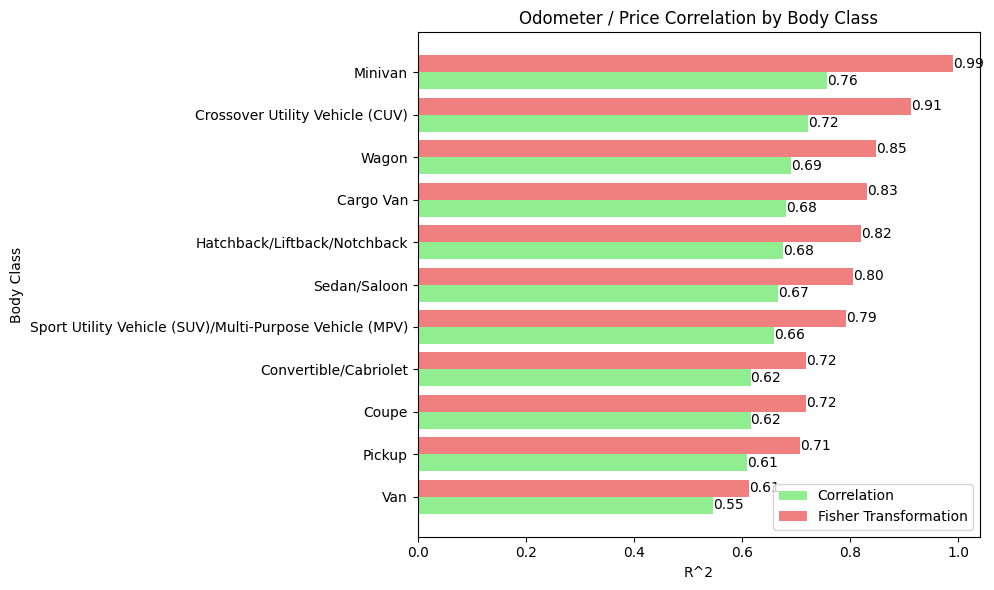

In [215]:
import matplotlib.pyplot as plt
import numpy as np

# Prepare data for plotting
data = results_df[['correlation', 'fisher_transformation']].sort_values(by='correlation')

# Set the figure size
plt.figure(figsize=(10, 6))

# Set the y positions for the bars
y = np.arange(len(data))

# Plot each column as horizontal bars
plt.barh(y - 0.2, data['correlation'], height=0.4, label='Correlation', color='lightgreen')
plt.barh(y + 0.2, data['fisher_transformation'], height=0.4, label='Fisher Transformation', color='lightcoral')

# Add titles and labels
plt.title('Odometer / Price Correlation by Body Class')
plt.xlabel('R^2')
plt.ylabel('Body Class')

# Set y-ticks to the sorted body class names
plt.yticks(y, data.index)

# Add bar labels
for i in range(len(data)):
    plt.text(data['correlation'].iloc[i], i - 0.2, f"{data['correlation'].iloc[i]:.2f}", va='center')
    plt.text(data['fisher_transformation'].iloc[i], i + 0.2, f"{data['fisher_transformation'].iloc[i]:.2f}", va='center')

# Add legend
plt.legend()

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


In [218]:
# URL of car, VIN of Car, id of the listing used in url
identifiers = ['VIN', 'VehicleDescriptor', 'id', 'url']

# Extra information that is already present from VIN Decoder. Some of these differ from the VIN information, likely entered incorrectly.
extra_cl = ['manufacturer', 'model', 'cylinders', 'fuel', 'transmission', 'drive', 'size', 'type', 'region']

# Maybe useful with more specific information about the local economy
useless_cl = ['county', 'lat', 'long', 'Year', 'year', 'title_status', 'image_url', 'region_url', 'posting_date']

# Contains highly specific and sparse information, increasing feature counts to the thousands.
too_many_unique_vals = ['OtherEngineInfo', 'OtherRestraintSystemInfo','EngineModel', 'PlantCity', 'PlantCompanyName', 
                        'Model', 'Trim','Series','Trim2','Series2', 'description']                    

# Contains exact same information as other columns
duplicate = ['DisplacementCC', 'EngineManufacturer', 'GVWR_to', 'Manufacturer', 'PlantCountry', 'PlantState']

# Too many features created by the # of unique values
extra_info = ['ActiveSafetySysNote', 'EngineCycles', 'ManufacturerId','Note']

# Many nulls, but provide some insight into ~2,500 vehicles.
good_number_info = ['BasePrice', 'EngineHP', 'EngineHP_to', 'displ', 'TopSpeedMPH', 'WheelBaseShort', 
                    'WheelSizeFront', 'WheelSizeRear', 'odometer','ModelYear', 'state_income']

#i dont want these\
no_good = ['Windows', 'Wheels']

pred = ['price']

# Provides the availability of luxury or safety features. EX: whether ABS / Side Airbags are 'Standard', 'Optional', or 'Not Available'
good_cats = [x for x in df17.columns if x not in identifiers+extra_cl+no_good+pred+useless_cl+too_many_unique_vals+duplicate+extra_info+good_number_info]

In [396]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df17['state'], df17['BodyClass'])

# Perform the Chi-Square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Output the results
print("Chi-Square Statistic:", chi2_stat)
print("P-Value:", p_value)
print("Degrees of Freedom:", dof)
print("Expected Frequencies Table:\n", expected)

# Interpretation
alpha = 0.05  # significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant association between State and BodyClass.")
else:
    print("Fail to reject the null hypothesis: There is no significant association between State and BodyClass.")
 

Chi-Square Statistic: 4550.524864966057
P-Value: 0.0
Degrees of Freedom: 500
Expected Frequencies Table:
 [[1.71746480e+01 2.25789733e+01 4.62279759e+01 2.03576466e+01
  5.65354736e+01 3.34553473e+01 2.45862941e+02 3.41515436e+02
  4.08588667e+02 5.14697652e+00 1.25559138e+01]
 [1.97579421e+01 2.59751494e+01 5.31812748e+01 2.34197058e+01
  6.50391564e+01 3.84874740e+01 2.82843979e+02 3.92883874e+02
  4.70045806e+02 5.92114984e+00 1.44444892e+01]
 [8.38860904e+00 1.10282423e+01 2.25791188e+01 9.94328027e+00
  2.76136074e+01 1.63405870e+01 1.20086775e+02 1.66806300e+02
  1.99566861e+02 2.51393646e+00 6.13268185e+00]
 [4.35753465e+01 5.72871471e+01 1.17289162e+02 5.16512190e+01
  1.43441243e+02 8.48825755e+01 6.23801016e+02 8.66489578e+02
  1.03666711e+03 1.30588578e+01 3.18567399e+01]
 [1.65898583e+02 2.18101686e+02 4.46539324e+02 1.96644771e+02
  5.46104641e+02 3.23162066e+02 2.37491410e+03 3.29886977e+03
  3.94676392e+03 4.97172409e+01 1.21283901e+02]
 [5.05303692e+01 6.64306983e+01 1.

In [397]:
# Prepare results
results = {
    'Chi-Square Statistic': [chi2_stat],
    'P-Value': [p_value],
    'Degrees of Freedom': [dof]
}

# Convert results into a DataFrame
results_df = pd.DataFrame(results)

# Combine the original DataFrame with the results
# You can reset the index to match the length if needed
combined_df = pd.concat([df16, results_df], axis=1)

ABS ActiveSafetySysNote AdaptiveCruiseControl AdaptiveDrivingBeam  \
0           NaN                 NaN                   NaN                 NaN   
1           NaN                 NaN                   NaN                 NaN   
2      Standard                 NaN              Optional                 NaN   
3      Standard                 NaN                   NaN                 NaN   
4           NaN                 NaN                   NaN                 NaN   
...         ...                 ...                   ...                 ...   
89329       NaN                 NaN                   NaN                 NaN   
89330  Standard                 NaN                   NaN                 NaN   
89331       NaN                 NaN                   NaN                 NaN   
89332       NaN                 NaN                   NaN                 NaN   
89333       NaN                 NaN                   NaN                 NaN   

       AirBagLocCurtain                  AirBagLocFront  \
0              All Rows  1st Row (Driver and Passenger)   
1                   NaN  1st Row (Driver and Passenger)   
2              All Rows  1st Row (Driver and Passenger)   
3              All Rows  1st Row (Driver and Passenger)   
4                   NaN  1st Row (Driver and Passenger)   
...                 ...                             ...   
89329          All Rows  1st Row (Driver and Passenger)   
89330  1st and 2nd Rows  1st Row (Driver and Passenger)   
89331               NaN  1st Row (Driver and Passenger)   
89332          All Rows  1st Row (Driver and Passenger)   
89333               NaN  1st Row (Driver and Passenger)   

                        AirBagLocKnee AirBagLocSeatCushion  \
0                                 NaN                  NaN   
1                                 NaN                  NaN   
2                                 NaN                  NaN   
3      1st Row (Driver and Passenger)                  NaN   
4                                 NaN                  NaN   
...                               ...                  ...   
89329  1st Row (Driver and Passenger)                  NaN   
89330  1st Row (Driver and Passenger)                  NaN   
89331                             NaN                  NaN   
89332                             NaN                  NaN   
89333                             NaN                  NaN   

                        AirBagLocSide AutoReverseSystem  ...  county state  \
0      1st Row (Driver and Passenger)               NaN  ...     NaN    al   
1      1st Row (Driver and Passenger)               NaN  ...     NaN    al   
2      1st Row (Driver and Passenger)          Standard  ...     NaN    al   
3      1st Row (Driver and Passenger)          Standard  ...     NaN    al   
4                                 NaN               NaN  ...     NaN    al   
...                               ...               ...  ...     ...   ...   
89329                1st and 2nd Rows               NaN  ...     NaN    wy   
89330  1st Row (Driver and Passenger)          Standard  ...     NaN    wy   
89331  1st Row (Driver and Passenger)               NaN  ...     NaN    wy   
89332  1st Row (Driver and Passenger)               NaN  ...     NaN    wy   
89333                             NaN               NaN  ...     NaN    wy   

             lat        long               posting_date  Year   displ  \
0      32.590000  -85.480000  2021-05-04 17:31:18+00:00  2014  5300.0   
1      32.590000  -85.480000  2021-05-04 17:31:08+00:00  2010  5300.0   
2      32.590000  -85.480000  2021-05-04 17:31:25+00:00  2020  5300.0   
3      32.590000  -85.480000  2021-05-04 15:41:31+00:00  2017  4600.0   
4      32.590000  -85.480000  2021-05-03 18:41:25+00:00  2012  6000.0   
...          ...         ...                        ...   ...     ...   
89329  41.138284 -104.784799  2021-04-14 15:45:59+00:00  2014  1400.0   
89330  33.779214  -84.411811  2021-04-14 09:00:24+00:00  2019  1

In [399]:
contingency_table = pd.crosstab(df17['state'], df17['BodyClass'])
contingency_table

BodyClass  Cargo Van  Convertible/Cabriolet  Coupe  \
state                                                
ak                 7                      9     21   
al                31                     32     74   
ar                 2                      9     22   
az                41                     98    147   
ca               213                    290    538   
co                42                     40     99   
ct                26                     38     49   
dc                24                     37     54   
de                 0                      2      8   
fl               122                    221    316   
ga                 9                     14     49   
hi                21                     20     38   
ia                39                     33     59   
id                21                     24     62   
il                28                     41     98   
in                33                     27     49   
ks                 6                     25     57   
ky                 8                      9     40   
la                 8                     10     61   
ma                26                     33     53   
md                17                     10     53   
me                 5                      8     18   
mi                29                     31     57   
mn                31                     16     56   
mo                 7                      8     17   
ms                 0                      2      1   
mt                 3                     12     19   
nc                35                     46     89   
nd                 1                      1      1   
ne                 1                      1      5   
nh                 2                      7      5   
nj                50                     46    113   
nm                 6                      6     29   
nv                 5                     15     38   
ny                42                     51     99   
oh                46                     40    103   
ok                 3                     15     43   
or                38                     67    130   
pa                31                     44     79   
ri                 5                     13      6   
sc                 2                     16     26   
sd                 2                      5     10   
tn                37                     25     86   
tx                38                     67    191   
ut                 2                      4      5   
va                38                     25     65   
vt                 3                      6     12   
wa                32                     40    112   
wi                49                     26     48   
wv                 0                      1      2   
wy                 1                      1      1   

BodyClass  Crossover Utility Vehicle (CUV)  Hatchback/Liftback/Notchback  \
state                                                                      
ak                                      14                            56   
al                                      34                            43   
ar                                      19                            15   
az                                      50                           213   
ca                                     170                           759   
co                                      64                           156   
ct                                      18                            91   
dc                                      31                            66   
de                                       0                            10   
fl                                     102                           251   
ga                                      15                            46   
hi                                      14                            62   
ia                                      35                           102 

In [416]:
contingency_table.sort_values(by='Sedan/Saloon')

BodyClass  Cargo Van  Convertible/Cabriolet  Coupe  \
state                                                
nd                 1                      1      1   
wy                 1                      1      1   
wv                 0                      1      2   
ms                 0                      2      1   
ut                 2                      4      5   
sd                 2                      5     10   
ne                 1                      1      5   
de                 0                      2      8   
ri                 5                     13      6   
nh                 2                      7      5   
me                 5                      8     18   
vt                 3                      6     12   
la                 8                     10     61   
ar                 2                      9     22   
mo                 7                      8     17   
nm                 6                      6     29   
mt                 3                     12     19   
sc                 2                     16     26   
nv                 5                     15     38   
ky                 8                      9     40   
ak                 7                      9     21   
ok                 3                     15     43   
md                17                     10     53   
hi                21                     20     38   
ga                 9                     14     49   
al                31                     32     74   
ct                26                     38     49   
ks                 6                     25     57   
dc                24                     37     54   
in                33                     27     49   
tn                37                     25     86   
wi                49                     26     48   
mn                31                     16     56   
ma                26                     33     53   
mi                29                     31     57   
va                38                     25     65   
nc                35                     46     89   
id                21                     24     62   
pa                31                     44     79   
ia                39                     33     59   
il                28                     41     98   
wa                32                     40    112   
az                41                     98    147   
co                42                     40     99   
ny                42                     51     99   
or                38                     67    130   
oh                46                     40    103   
nj                50                     46    113   
tx                38                     67    191   
fl               122                    221    316   
ca               213                    290    538   

BodyClass  Crossover Utility Vehicle (CUV)  Hatchback/Liftback/Notchback  \
state                                                                      
nd                                       1                             2   
wy                                       0                             0   
wv                                       0                             2   
ms                                       1                             4   
ut                                       1                            12   
sd                                       0                             7   
ne                                       2                             7   
de                                       0                            10   
ri                                       4                            17   
nh                                      11                            15   
me                                      14                            27   
vt                                      41                            34   
la                                       8                            18 

In [402]:
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Output results
print("Chi-Square Statistic:", chi2_stat)
print("P-Value:", p_value)
print("Expected Frequencies:\n", expected)

# Calculate residuals
residuals = contingency_table - expected
adjusted_residuals = residuals / (expected**0.5)

# Output adjusted residuals
print("Adjusted Residuals:\n", adjusted_residuals)

# Identify strong associations
threshold = 2  # Common threshold for significance
strong_associations = adjusted_residuals[(adjusted_residuals > threshold) | (adjusted_residuals < -threshold)]

print("Strong Associations:\n", strong_associations)

Chi-Square Statistic: 4550.524864966057
P-Value: 0.0
Expected Frequencies:
 [[1.71746480e+01 2.25789733e+01 4.62279759e+01 2.03576466e+01
  5.65354736e+01 3.34553473e+01 2.45862941e+02 3.41515436e+02
  4.08588667e+02 5.14697652e+00 1.25559138e+01]
 [1.97579421e+01 2.59751494e+01 5.31812748e+01 2.34197058e+01
  6.50391564e+01 3.84874740e+01 2.82843979e+02 3.92883874e+02
  4.70045806e+02 5.92114984e+00 1.44444892e+01]
 [8.38860904e+00 1.10282423e+01 2.25791188e+01 9.94328027e+00
  2.76136074e+01 1.63405870e+01 1.20086775e+02 1.66806300e+02
  1.99566861e+02 2.51393646e+00 6.13268185e+00]
 [4.35753465e+01 5.72871471e+01 1.17289162e+02 5.16512190e+01
  1.43441243e+02 8.48825755e+01 6.23801016e+02 8.66489578e+02
  1.03666711e+03 1.30588578e+01 3.18567399e+01]
 [1.65898583e+02 2.18101686e+02 4.46539324e+02 1.96644771e+02
  5.46104641e+02 3.23162066e+02 2.37491410e+03 3.29886977e+03
  3.94676392e+03 4.97172409e+01 1.21283901e+02]
 [5.05303692e+01 6.64306983e+01 1.36009582e+02 5.98952247e+01
  

In [465]:
adjusted_residuals.to_csv('adjusted_residuals.csv')

In [428]:
adjusted_residuals.index

Index(['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi',
       'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn',
       'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh',
       'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa',
       'wi', 'wv', 'wy'],
      dtype='object', name='state')

In [516]:
null_counts_percentage = {
    k: f"{round(v / len(df17) * 100, 2)}%"
    for k, v in df17[['ABS','AdaptiveCruiseControl','BasePrice','Series', 'Series2', 'Trim', 'Trim2']].isnull().sum().to_dict().items()
}

# Display the result
print(null_counts_percentage)

{'ABS': '75.01%', 'AdaptiveCruiseControl': '91.43%', 'BasePrice': '83.54%', 'Series': '41.31%', 'Series2': '81.77%', 'Trim': '45.08%', 'Trim2': '97.16%'}


In [ ]:
{'ABS': '75.01%', 'AdaptiveCruiseControl': '91.43%', 'BasePrice': '83.54%', 'Series': '41.31%', 'Series2': '81.77%', 'Trim': '45.08%', 'Trim2': '97.16%'}

In [ ]:
bars = plt.barh(df['State'], df['Residuals'], color=df['Residuals'].apply(lambda x: 'skyblue' if x > 0 else 'lightcoral'))

In [ ]:
 break
    new_index = range(len(t_df))
    
    # Plotting
    plt.figure(figsize=(8,4))
    plt.scatter(new_index, t_df[col], color='skyblue')
    
    # Adding labels for each point with the old index
    for i, old_index in enumerate(t_df.index):
        plt.text(new_index[i], t_df[col].iloc[i], old_index, fontsize=9, ha='right')
    
    # Add titles and labels
    plt.title(f'Level of Association of State with {col}')
    #plt.xticks()
    plt.ylabel('Adjusted Residuals')
    
    # Show the plot
    plt.show()

    #print(adjusted_residuals[adjusted_residuals[col].abs() > 2][col].sort_values())

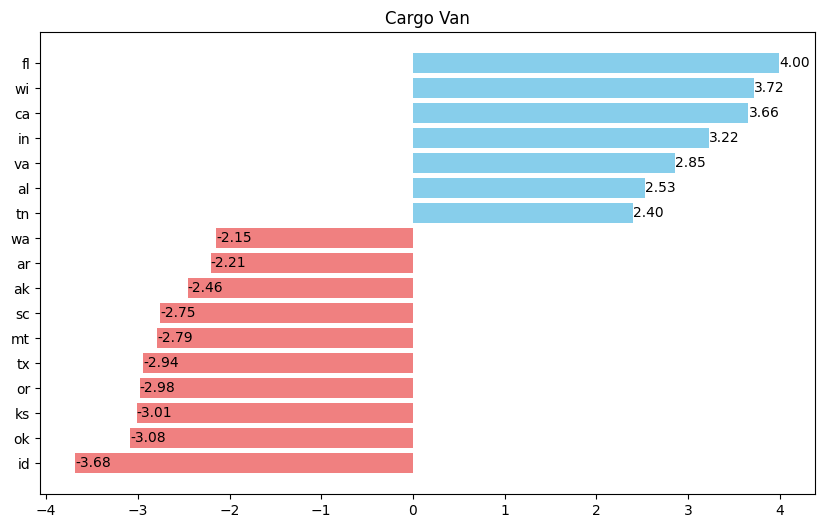

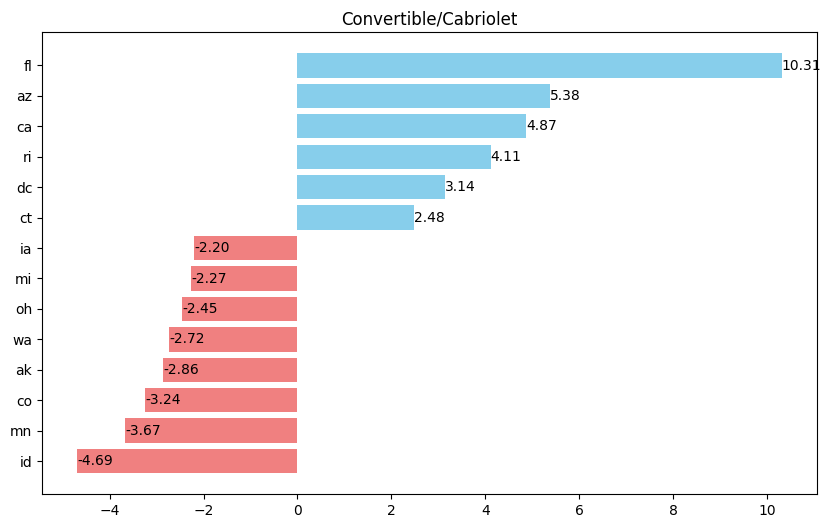

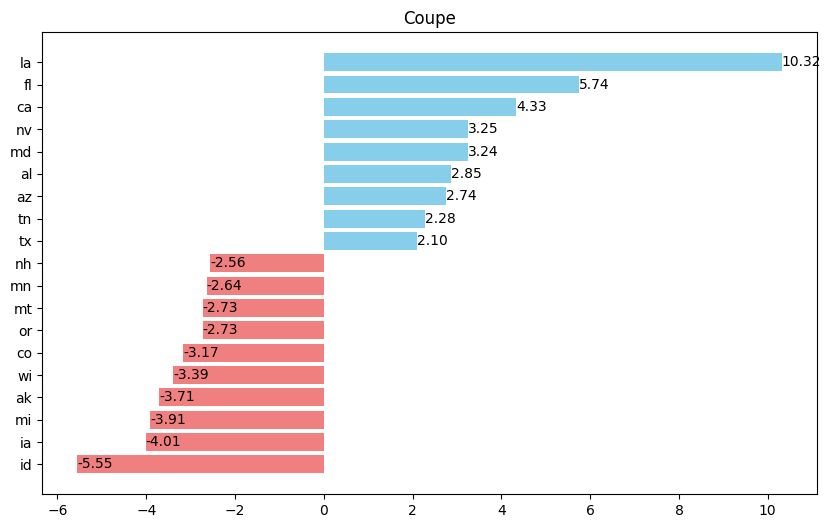

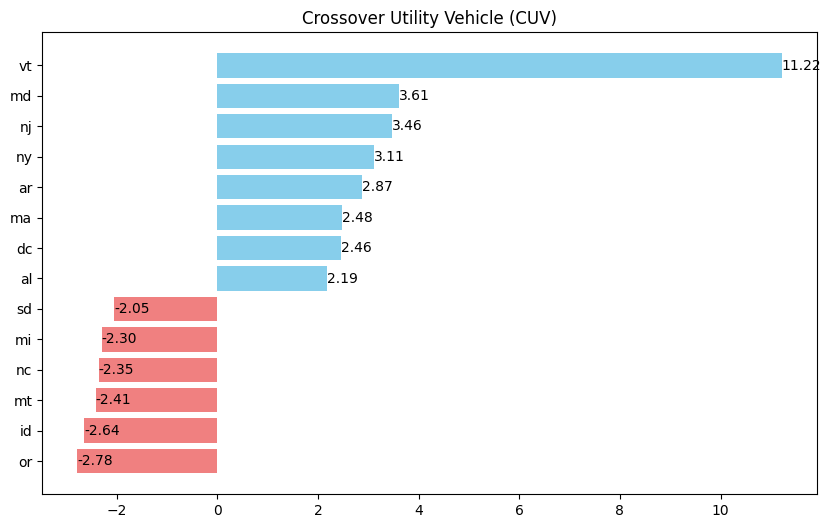

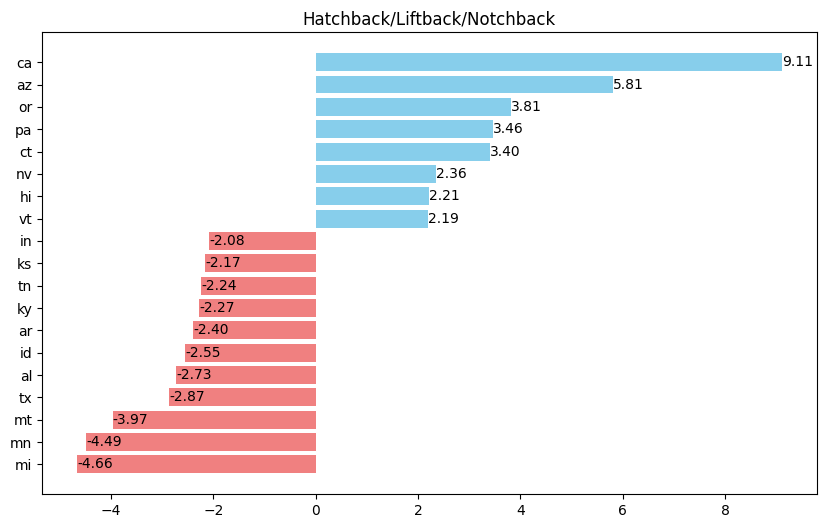

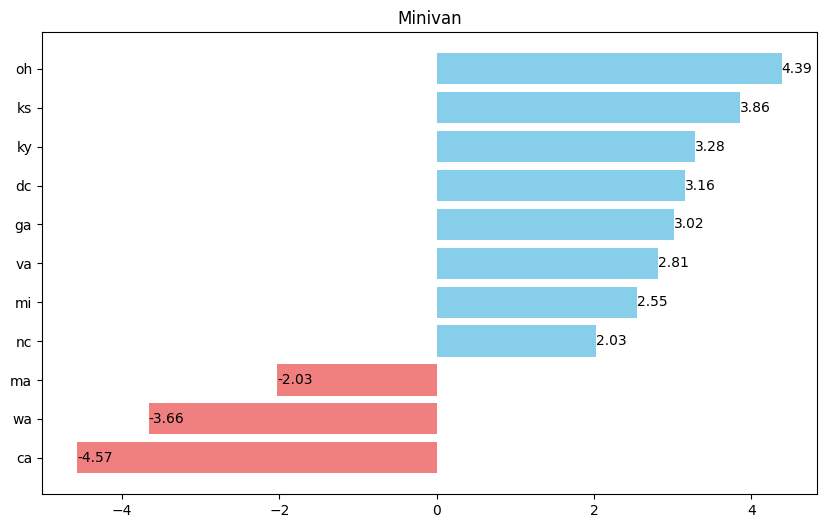

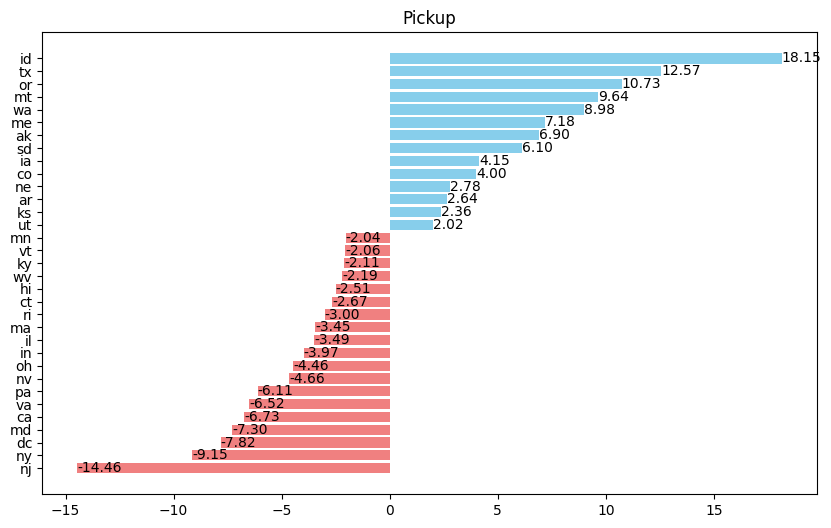

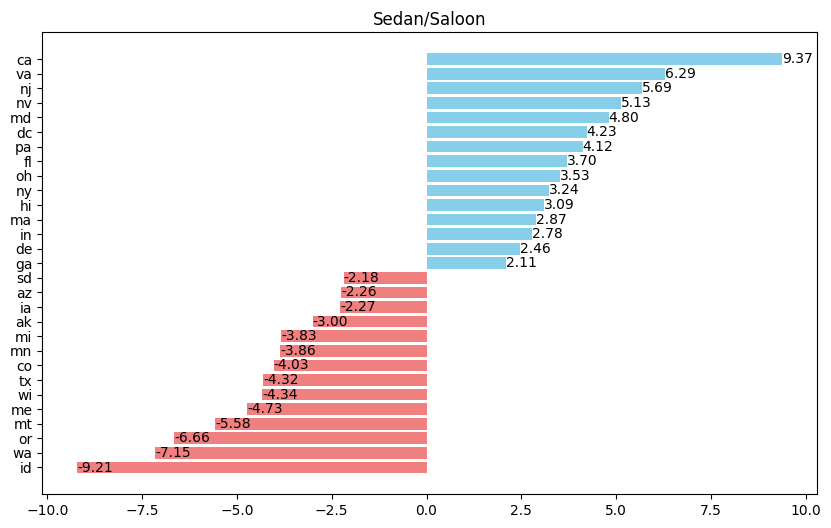

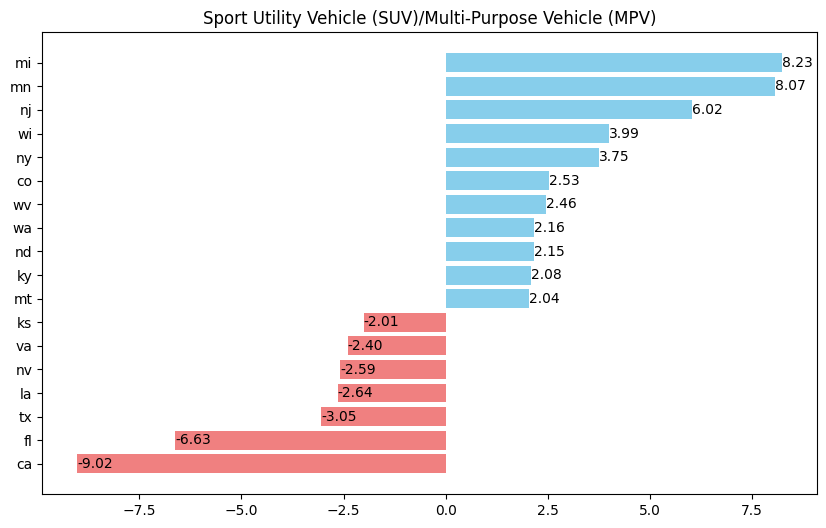

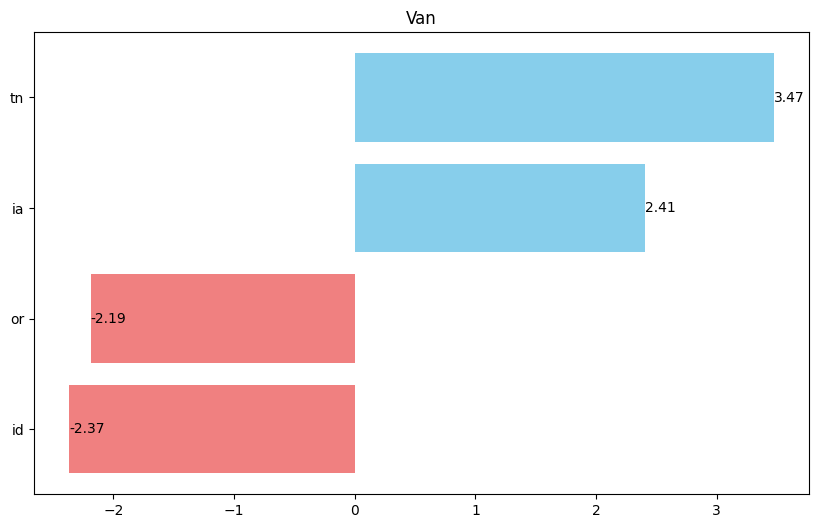

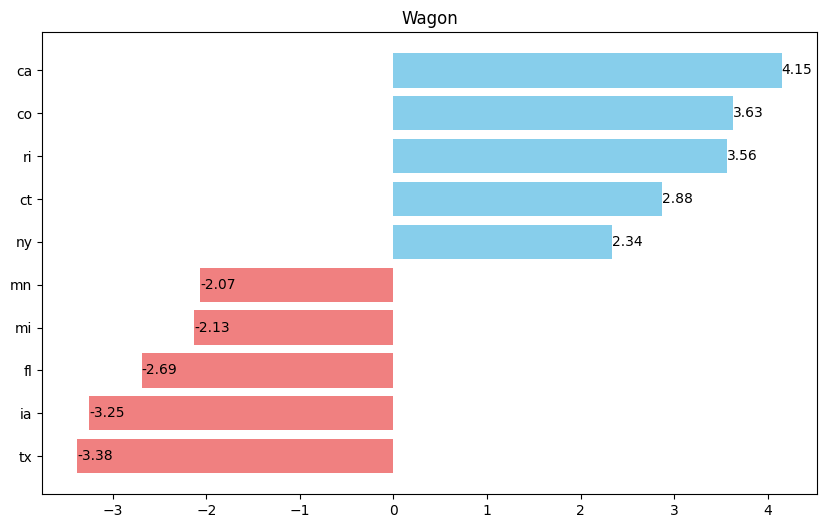

In [501]:
for col in adjusted_residuals.columns:
    t_df = adjusted_residuals[adjusted_residuals[col].abs() > 2].sort_values(by=[col])
    plt.figure(figsize=(10,6))
    bars = plt.barh(t_df.index, t_df[col], color=t_df[col].apply(lambda x: 'skyblue' if x > 0 else 'lightcoral'))
    plt.title(col)
    for bar in bars:
        plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width():.2f}', va='center')    
    plt.show()

In [457]:
dc ={}
for col in adjusted_residuals.columns:
    r_dc ={}
    r_dc['min'] = adjusted_residuals[col].min()
    r_dc['max'] = adjusted_residuals[col].max()
    r_dc['min_state'] = adjusted_residuals[adjusted_residuals[col] == adjusted_residuals[col].min()].index[0]
    r_dc['max_state'] = adjusted_residuals[adjusted_residuals[col] == adjusted_residuals[col].max()].index[0]
    dc[col] = r_dc

In [460]:
df = pd.DataFrame(dc).T

In [463]:
df

min        max  \
Cargo Van                                           -3.684794   3.995379   
Convertible/Cabriolet                               -4.688972  10.310137   
Coupe                                               -5.553206  10.318143   
Crossover Utility Vehicle (CUV)                     -2.779462  11.218638   
Hatchback/Liftback/Notchback                        -4.663838   9.110207   
Minivan                                             -4.570473   4.386809   
Pickup                                             -14.455878  18.148431   
Sedan/Saloon                                        -9.208632    9.36925   
Sport Utility Vehicle (SUV)/Multi-Purpose Vehic...   -9.02156   8.227489   
Van                                                 -2.365576   3.471882   
Wagon                                               -3.380539   4.151142   

                                                   min_state max_state  
Cargo Van                                                 id        fl  
Convertible/Cabriolet                                     id        fl  
Coupe                                                     id        la  
Crossover Utility Vehicle (CUV)                           or        vt  
Hatchback/Liftback/Notchback                              mi        ca  
Minivan                                                   ca        oh  
Pickup                                                    nj        id  
Sedan/Saloon                                              id        ca  
Sport Utility Vehicle (SUV)/Multi-Purpose Vehic...        ca        mi  
Van                                                       id        tn  
Wagon                                                     tx        ca

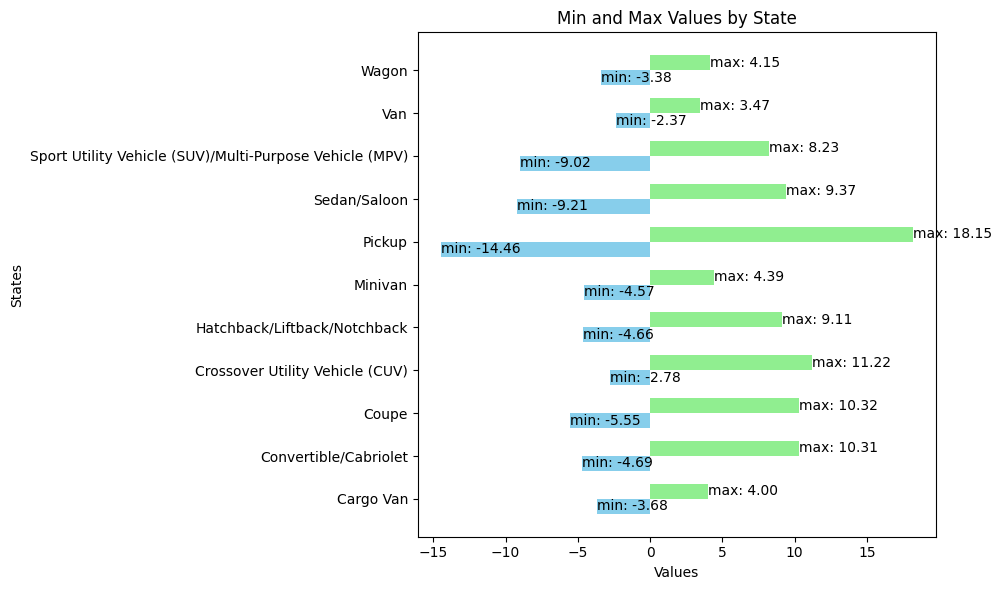

In [462]:
plt.figure(figsize=(10, 6))

# Bar width and positions
bar_width = 0.35
x = range(len(df))

# Create horizontal bar plots
bars_min = plt.barh(x, df['min'], height=bar_width, color='skyblue', label='Min State')
bars_max = plt.barh([i + bar_width for i in x], df['max'], height=bar_width, color='lightgreen', label='Max State')

# Adding labels to bars
for bar in bars_min:
    yval = round(bar.get_width(), 2)
    plt.text(yval, bar.get_y() + bar.get_height()/2, f'min: {yval:.2f}', va='center')

for bar in bars_max:
    yval = round(bar.get_width(), 2)
    plt.text(yval, bar.get_y() + bar.get_height()/2, f'max: {yval:.2f}', va='center')

# Add titles and labels
plt.title('Min and Max Values by State')
plt.xlabel('Values')
plt.ylabel('States')
plt.yticks([i + bar_width / 2 for i in x], df.index)  # Set y-ticks to state labels

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [435]:
from scipy.stats import fisher_exact

p_values = {}

# Loop through each unique combination of states and body classes
for state in contingency_table.index:
    for body_class in contingency_table.columns:
        # Create a 2x2 table for Fisher's test
        observed = contingency_table.loc[state, body_class]
        other = contingency_table.sum().sum() - observed
        
        # Construct the 2x2 table
        table = [[observed, contingency_table.loc[state].sum() - observed],
                 [contingency_table.sum().sum() - contingency_table.loc[state].sum(),
                  contingency_table.sum().sum() - contingency_table.loc[:, body_class].sum() + observed]]

        # Perform Fisher's Exact Test
        odds_ratio, p_value = fisher_exact(table)

        # Store the p-value
        p_values[(state, body_class)] = p_value

# Convert the results to a DataFrame for better visualization
p_values_df = pd.DataFrame(p_values.items(), columns=['Combination', 'P-Value'])
p_values_df[['State', 'BodyClass']] = pd.DataFrame(p_values_df['Combination'].tolist(), index=p_values_df.index)

# Display the DataFrame
p_values_df[['State', 'BodyClass', 'P-Value']]

State                                          BodyClass        P-Value
0      ak                                          Cargo Van   0.000000e+00
1      ak                              Convertible/Cabriolet   0.000000e+00
2      ak                                              Coupe   0.000000e+00
3      ak                    Crossover Utility Vehicle (CUV)   0.000000e+00
4      ak                       Hatchback/Liftback/Notchback  3.537738e-274
..    ...                                                ...            ...
556    wy                                             Pickup   3.101011e-03
557    wy                                       Sedan/Saloon   1.762678e-05
558    wy  Sport Utility Vehicle (SUV)/Multi-Purpose Vehi...   1.178419e-04
559    wy                                                Van   1.053616e-13
560    wy                                              Wagon   9.223834e-14

[561 rows x 3 columns]

In [444]:
p_values_df[p_values_df['P-Value'] < .00000005]

Combination        P-Value State  \
0                          (ak, Cargo Van)   0.000000e+00    ak   
1              (ak, Convertible/Cabriolet)   0.000000e+00    ak   
2                              (ak, Coupe)   0.000000e+00    ak   
3    (ak, Crossover Utility Vehicle (CUV))   0.000000e+00    ak   
4       (ak, Hatchback/Liftback/Notchback)  3.537738e-274    ak   
..                                     ...            ...   ...   
553  (wy, Crossover Utility Vehicle (CUV))   8.007488e-14    wy   
554     (wy, Hatchback/Liftback/Notchback)   4.079837e-14    wy   
555                          (wy, Minivan)   7.153114e-11    wy   
559                              (wy, Van)   1.053616e-13    wy   
560                            (wy, Wagon)   9.223834e-14    wy   

                           BodyClass  
0                          Cargo Van  
1              Convertible/Cabriolet  
2                              Coupe  
3    Crossover Utility Vehicle (CUV)  
4       Hatchback/Liftback/Notchback  
..                               ...  
553  Crossover Utility Vehicle (CUV)  
554     Hatchback/Liftback/Notchback  
555                          Minivan  
559                              Van  
560                            Wagon  

[553 rows x 4 columns]

In [420]:
pd.merge(adjusted_residuals.T, min_max_df.reset_index(), on='BodyClass').T

0                      1          2   \
BodyClass  Cargo Van  Convertible/Cabriolet      Coupe   
ak         -2.455136              -2.857688  -3.710479   
al          2.529152               1.182135   2.854794   
ar         -2.205776              -0.610755  -0.121875   
az         -0.390135               5.379017    2.74338   
ca          3.656896               4.868433   4.328172   
co         -1.200029               -3.24283  -3.173434   
ct          1.501402                2.47784  -0.441292   
dc           1.73399               3.144775   1.272182   
de         -1.620455              -0.781571   0.350599   
fl          3.995379              10.310137   5.737078   
ga          -1.66801              -1.433568    1.08865   
hi          1.792542               0.296727  -0.051622   
ia          0.373896              -2.200633  -4.010071   
id         -3.684794              -4.688972  -5.553206   
il          -0.98355              -0.498443   0.762501   
in          3.223423               0.414545  -0.285792   
ks          -3.01313              -0.049236   0.738382   
ky         -1.224174              -1.781083   1.202108   
la          0.563269               0.469639  10.318143   
ma          0.655304               0.535896  -1.089595   
md          1.219433              -1.628744   3.241204   
me         -1.258437              -1.021433  -1.126876   
mi         -1.064754              -2.266368  -3.906273   
mn          0.266411              -3.666071  -2.639708   
mo         -0.415785               -0.84326  -1.074358   
ms         -1.085401               0.362548  -1.219166   
mt         -2.785869              -1.250994   -2.72879   
nc          0.817049               0.934702    0.76563   
nd          0.285611               0.011065  -0.720224   
ne         -1.437656              -1.789113   -1.63725   
nh         -1.498628               -0.09608  -2.558104   
nj          1.033552              -1.433249  -0.305621   
nm         -0.734969              -1.421614    1.54786   
nv         -1.169975               1.195996   3.245306   
ny          0.298097              -0.238787  -0.862996   
oh          0.194948               -2.44747  -1.577918   
ok         -3.083423              -1.037703   0.455474   
or         -2.979254              -1.518037  -2.730559   
pa          0.639996               1.272217   0.535091   
ri          0.911339               4.113895  -0.993927   
sc         -2.753846               0.322677  -0.767672   
sd         -0.816123               0.164033   0.157886   
tn          2.397596               -1.37415   2.277097   
tx         -2.940993              -1.468431   2.100724   
ut         -0.512128               0.118784  -0.978178   
va           2.85349              -1.169823   0.044433   
vt         -1.541679              -1.095249  -1.632152   
wa         -2.145593              -2.724348  -1.211793   
wi          3.721453              -1.958351  -3.394662   
wv         -0.762857               0.268585   0.346446   
wy          0.498772               0.220601  -0.501522   
Min        -3.684794              -4.688972  -5.553206   
Max         3.995379              10.310137  10.318143   

                                        3                             4   \
BodyClass  Crossover Utility Vehicle (CUV)  Hatchback/Liftback/Notchback   
ak                                -1.40907                     -0.071216   
al                                2.186286                     -2.732798   
ar                                2.872143                     -2.400367   
az                               -0.229755                      5.807842   
ca                               -1.900075                      9.110207   
co                                0.530388                     -0.801402   
ct                               -1.039276                      3.401628   
dc                                 2.45844                      1.401457   
de                               -1.764237                      0.4

<Axes: >

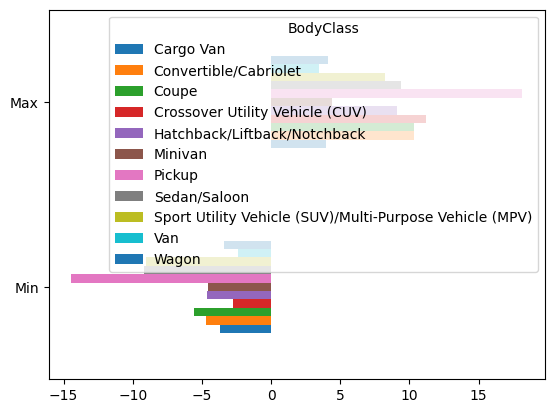

In [407]:
min_max_df.T.plot(kind='barh')

In [206]:
from sklearn.preprocessing import MinMaxScaler
df_scaled = df17.copy()

# Specify the columns to scale
columns_to_scale = ['ModelYear', 'odometer', 'price', 'displ', 'Doors', 'EngineCylinders']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Scale the specified columns
df_scaled[columns_to_scale] = scaler.fit_transform(df_scaled[columns_to_scale])

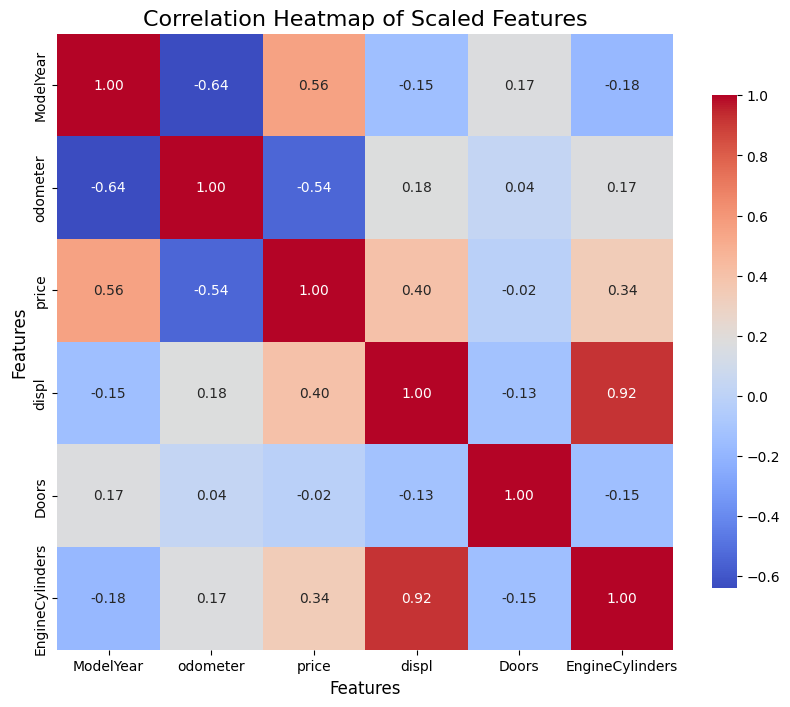

In [209]:
import seaborn as sns
correlation_matrix = df_scaled[columns_to_scale].corr()

# Set the figure size
plt.figure(figsize=(10, 8))

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True, cbar_kws={"shrink": .8})

# Add titles and labels
plt.title('Correlation Heatmap of Scaled Features', fontsize=16)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Features', fontsize=12)

# Show the plot
plt.show()

C:\Users\pgrts\AppData\Local\Temp\ipykernel_21904\3879082456.py:33: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


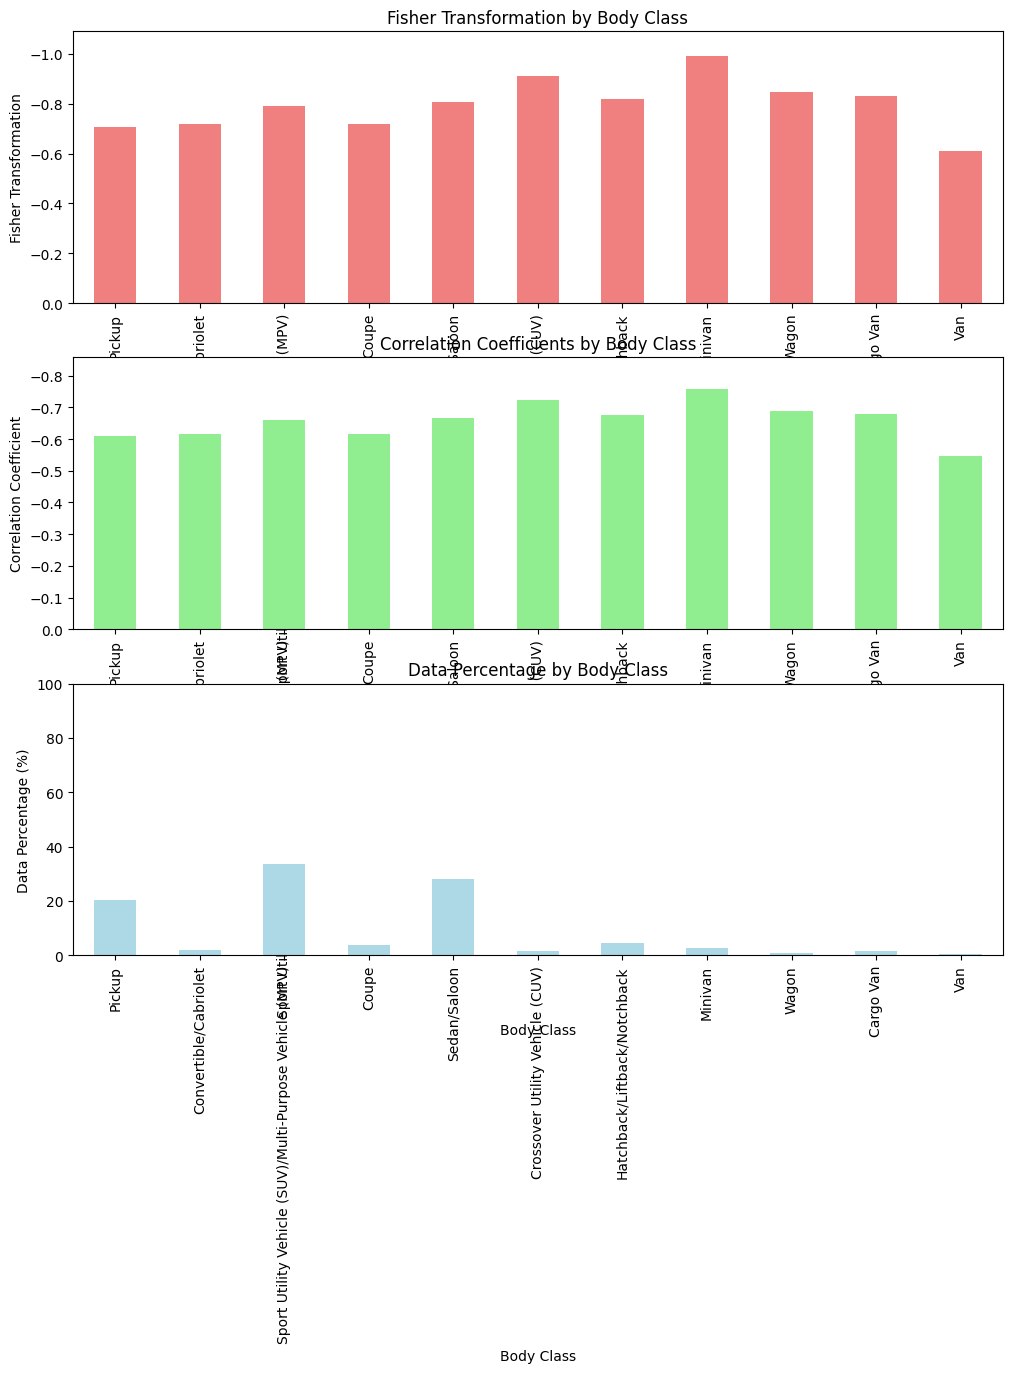

In [186]:
import matplotlib.pyplot as plt

# Set the figure size for better visibility
plt.figure(figsize=(12, 12))

# Plot for Fisher Transformation
plt.subplot(3, 1, 1)  # Three rows, one column, first subplot
results_df['fisher_transformation'].plot(kind='bar', color='lightcoral')
plt.title('Fisher Transformation by Body Class')
plt.xlabel('Body Class')
plt.ylabel('Fisher Transformation')
plt.ylim(results_df['fisher_transformation'].min() - 0.1, 0)  # Invert for negative values
plt.gca().invert_yaxis()  # Invert y-axis

# Plot for Correlation
plt.subplot(3, 1, 2)  # Second subplot
results_df['correlation'].plot(kind='bar', color='lightgreen')
plt.title('Correlation Coefficients by Body Class')
plt.xlabel('Body Class')
plt.ylabel('Correlation Coefficient')
plt.ylim(results_df['correlation'].min() - 0.1, 0)  # Invert for negative values
plt.gca().invert_yaxis()  # Invert y-axis

# Plot for Data Percent
plt.subplot(3, 1, 3)  # Third subplot
results_df['data_percent'].str.rstrip('%').astype(float).plot(kind='bar', color='lightblue')
plt.title('Data Percentage by Body Class')
plt.xlabel('Body Class')
plt.ylabel('Data Percentage (%)')
plt.ylim(0, 100)  # Set limits from 0 to 100 for percentage

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


In [180]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr, t

# Sample DataFrame creation (replace this with your actual DataFrame)
# df17 = pd.read_csv('your_data.csv')

# Define body classes
body_classes = [
    'Pickup', 
    'Convertible/Cabriolet', 
    'Sport Utility Vehicle (SUV)/Multi-Purpose Vehicle (MPV)', 
    'Coupe', 
    'Sedan/Saloon', 
    'Crossover Utility Vehicle (CUV)', 
    'Hatchback/Liftback/Notchback', 
    'Minivan', 
    'Wagon', 
    'Cargo Van', 
    'Van'
]

# Initialize results dictionary
results = {bodyclass: {'correlation': None, 'p_value': None, 'fisher_transformation': None} for bodyclass in body_classes}

# Loop through each body class
for bodyclass in body_classes:
    # Filter the DataFrame for the current body class
    subset = df17[df17['BodyClass'].str.lower() == bodyclass.lower()]
    
    # Check if there are enough data points
    if len(subset) > 1:  # At least 2 points required to compute correlation
        # Calculate the Pearson correlation coefficient and p-value
        r, p_value = pearsonr(subset['price'], subset['odometer'])
        
        # Store results
        results[bodyclass] = {
            'correlation': r,
            'p_value': p_value,
            'fisher_transformation': fisher_transformation(r) if r not in [1, -1] else np.inf
        }

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results).T

results_df

correlation  \
Pickup                                                -0.609339   
Convertible/Cabriolet                                 -0.615615   
Sport Utility Vehicle (SUV)/Multi-Purpose Vehic...    -0.659377   
Coupe                                                 -0.615544   
Sedan/Saloon                                          -0.666790   
Crossover Utility Vehicle (CUV)                       -0.722025   
Hatchback/Liftback/Notchback                          -0.675489   
Minivan                                               -0.757538   
Wagon                                                 -0.690063   
Cargo Van                                             -0.680670   
Van                                                   -0.545726   

                                                          p_value  \
Pickup                                               0.000000e+00   
Convertible/Cabriolet                               1.821831e-174   
Sport Utility Vehicle (SUV)/Multi-Purpose Vehic...   0.000000e+00   
Coupe                                                0.000000e+00   
Sedan/Saloon                                         0.000000e+00   
Crossover Utility Vehicle (CUV)                     2.132597e-242   
Hatchback/Liftback/Notchback                         0.000000e+00   
Minivan                                              0.000000e+00   
Wagon                                               4.991852e-132   
Cargo Van                                           2.702164e-173   
Van                                                  7.119249e-31   

                                                    fisher_transformation  
Pickup                                                          -0.707870  
Convertible/Cabriolet                                           -0.717914  
Sport Utility Vehicle (SUV)/Multi-Purpose Vehic...              -0.791710  
Coupe                                                           -0.717799  
Sedan/Saloon                                                    -0.804942  
Crossover Utility Vehicle (CUV)                                 -0.911862  
Hatchback/Liftback/Notchback                                    -0.820770  
Minivan                                                         -0.990412  
Wagon                                                           -0.848077  
Cargo Van                                                       -0.830361  
Van                                                             -0.612274

In [164]:
bc_dc = df17.BodyClass.value_counts()[:9].to_dict()
corr_dc = {}

for bc in bc_dc.keys():
    t_df = df17[df17.BodyClass == bc]
    corr_dc[bc] = t_df.price.corr(t_df.odometer)

In [165]:
corr_dc

{'Sport Utility Vehicle (SUV)/Multi-Purpose Vehicle (MPV)': -0.6593765698368734,
 'Sedan/Saloon': -0.6667904836485888,
 'Pickup': -0.6093392720869433,
 'Hatchback/Liftback/Notchback': -0.6754889479201673,
 'Coupe': -0.6155443373985,
 'Minivan': -0.7575378843379904,
 'Convertible/Cabriolet': -0.6156153641838132,
 'Crossover Utility Vehicle (CUV)': -0.7220248652071428,
 'Cargo Van': -0.6806696077687611}

<Axes: >

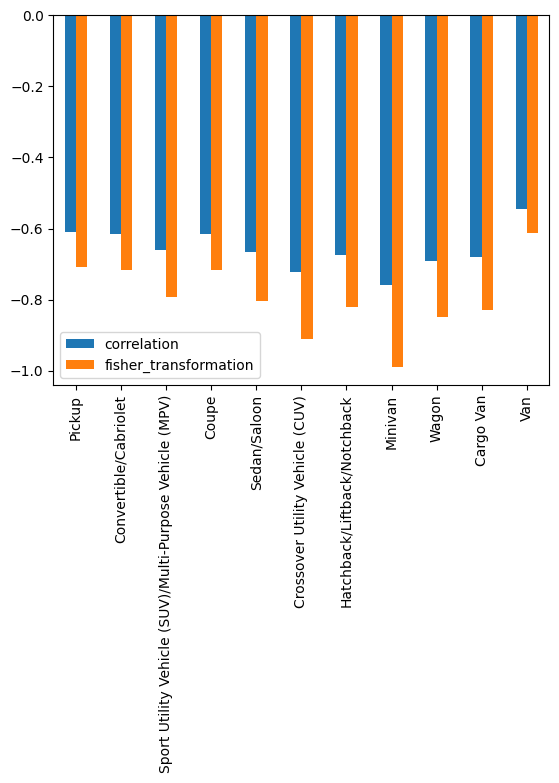

In [147]:
results_df.plot(kind='bar')

In [151]:
from scipy.stats import pearsonr, t

bodyclass = 'Pickup'  # Example category
subset = df17[df17['BodyClass'] == bodyclass]

# Calculate Pearson correlation
r, _ = pearsonr(subset['price'], subset['odometer'])
n = len(subset)

# Calculate t-statistic
t_stat = r * np.sqrt(n - 2) / np.sqrt(1 - r**2)
df = n - 2

# Calculate the critical value
alpha = 0.05
t_critical = t.ppf(1 - alpha/2, df)  # Two-tailed test

# Print results
print(f"Correlation (r): {r}")
print(f"t-statistic: {t_stat}")
print(f"Critical t-value: {t_critical}")

# Determine significance
if abs(t_stat) > t_critical:
    print("Reject the null hypothesis: correlation is statistically significant.")
else:
    print("Fail to reject the null hypothesis: correlation is not statistically significant.")


Correlation (r): -0.6093392720869434
t-statistic: -103.53180888459751
Critical t-value: 1.9600946967575537
Reject the null hypothesis: correlation is statistically significant.


In [41]:
for each in df7.columns:
    print(df7[each].value_counts(dropna=False))
    print('\n')

ABS
NaN         67968
Standard    22507
Optional       18
Name: count, dtype: int64


ActiveSafetySysNote
NaN                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  83636
Rear Park Assist: Optional                                                                                                                                                                                                                                                                                                                                                                         

In [61]:
df7.EngineCylinders.value_counts(dropna=True)

EngineCylinders
4.0     34978
6.0     31344
8.0     19646
5.0       709
3.0       274
10.0      117
0.0        81
12.0       61
2.0        19
Name: count, dtype: int64

In [4]:
cat_feats = ['Turbo', 'BodyClass', 'FuelTypePrimary', 'EngineCylinders', 'VehicleType', 'DriveType','GVWR', 'Doors', 'paint_color']

In [54]:
df17[cat_feats].describe()

Turbo                                          BodyClass  \
count   89334                                              89334   
unique      2                                                 11   
top         0  Sport Utility Vehicle (SUV)/Multi-Purpose Vehi...   
freq    80260                                              30166   

       FuelTypePrimary EngineCylinders    VehicleType DriveType  \
count            89334           89334          89334     89334   
unique               6               9              3         5   
top           Gasoline             4.0  PASSENGER CAR       4WD   
freq             81710           36598          35668     31988   

                                                GVWR  Doors paint_color  
count                                          89334  89334       89334  
unique                                            12      5          12  
top     Class 1: 6,000 lb or less (2,722 kg or less)    4.0       white  
freq                                           32496  71275       23878

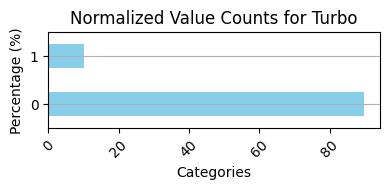

C:\Users\pgrts\AppData\Local\Temp\ipykernel_21904\575287882.py:17: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


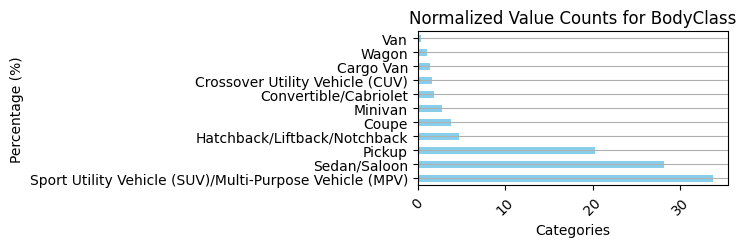

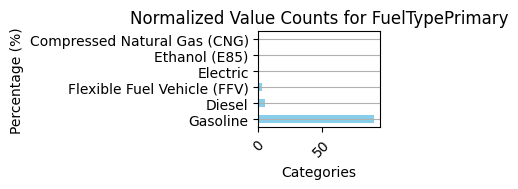

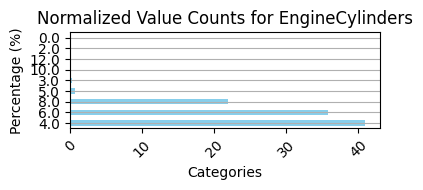

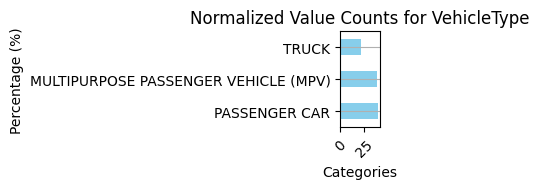

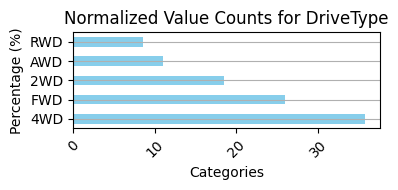

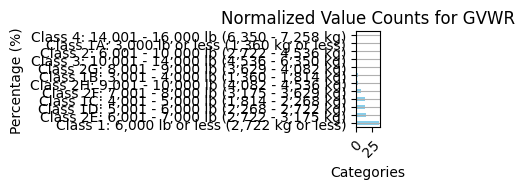

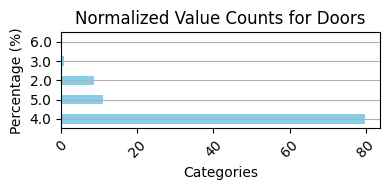

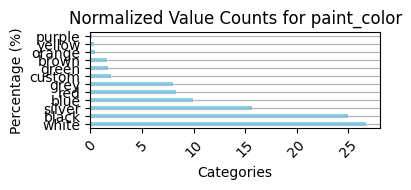

In [72]:
for col in cat_feats:
    plt.figure(figsize=(4,2))
    
    # Calculate normalized value counts
    normalized_counts = df17[col].value_counts(normalize=True) * 100
    
    # Plot as a bar graph
    normalized_counts.plot(kind='barh', stacked=True, color='skyblue')
    
    plt.title(f'Normalized Value Counts for {col}')
    plt.xlabel('Categories')
    plt.ylabel('Percentage (%)')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    
    # Show the plot
    plt.tight_layout()
    plt.show()

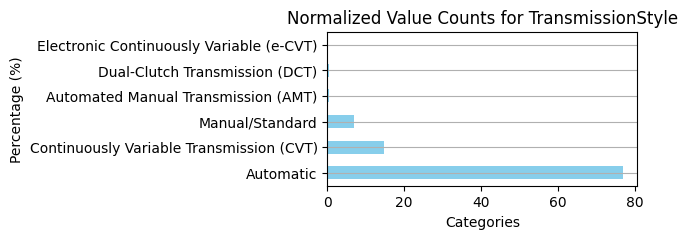

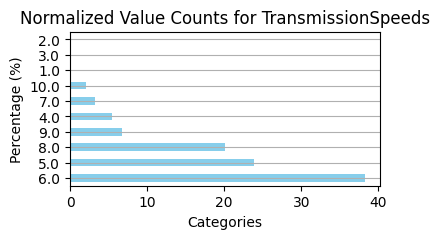

In [69]:
for col in ['TransmissionStyle','TransmissionSpeeds']:
    plt.figure(figsize=(4,2))
    
    # Calculate normalized value counts
    normalized_counts = df17[col].value_counts(normalize=True) * 100
    
    # Plot as a bar graph
    normalized_counts.plot(kind='barh', stacked=True, color='skyblue')
    
    plt.title(f'Normalized Value Counts for {col}')
    plt.xlabel('Categories')
    plt.ylabel('Percentage (%)')

    plt.grid(axis='y')
    
    # Show the plot

    plt.show()

In [26]:
df17[cols_values]= df17[cols_values].astype(str)

In [31]:
#cols_values = cat_feats + num_feats
normalized_counts = {}
for column in cat_feats:
    normalized_counts[column] = df17[column].astype(str).value_counts(normalize=True) * 100

In [15]:
df17['EngineCylinders'] = df17['EngineCylinders'].astype(str)

In [32]:
normalized_counts

{'Turbo': Turbo
 0    89.842613
 1    10.157387
 Name: proportion, dtype: float64,
 'BodyClass': BodyClass
 Sport Utility Vehicle (SUV)/Multi-Purpose Vehicle (MPV)    33.767658
 Sedan/Saloon                                               28.224416
 Pickup                                                     20.319251
 Hatchback/Liftback/Notchback                                4.672353
 Coupe                                                       3.820494
 Minivan                                                     2.764905
 Convertible/Cabriolet                                       1.866031
 Crossover Utility Vehicle (CUV)                             1.682450
 Cargo Van                                                   1.419392
 Wagon                                                       1.037679
 Van                                                         0.425370
 Name: proportion, dtype: float64,
 'FuelTypePrimary': FuelTypePrimary
 Gasoline                        91.465735
 Diesel  

In [37]:
normalized_df = pd.DataFrame(normalized_counts)
normalized_df

Turbo  BodyClass  \
0                                                   89.842613        NaN   
0.0                                                       NaN        NaN   
1                                                   10.157387        NaN   
10.0                                                      NaN        NaN   
12.0                                                      NaN        NaN   
2.0                                                       NaN        NaN   
2WD                                                       NaN        NaN   
3.0                                                       NaN        NaN   
4.0                                                       NaN        NaN   
4WD                                                       NaN        NaN   
5.0                                                       NaN        NaN   
6.0                                                       NaN        NaN   
8.0                                                       NaN        NaN   
AWD                                                       NaN        NaN   
Cargo Van                                                 NaN   1.419392   
Class 1: 6,000 lb or less (2,722 kg or less)              NaN        NaN   
Class 1A: 3,000 lb or less (1,360 kg or less)             NaN        NaN   
Class 1B: 3,001 - 4,000 lb (1,360 - 1,814 kg)             NaN        NaN   
Class 1C: 4,001 - 5,000 lb (1,814 - 2,268 kg)             NaN        NaN   
Class 1D: 5,001 - 6,000 lb (2,268 - 2,722 kg)             NaN        NaN   
Class 2: 6,001 - 10,000 lb (2,722 - 4,536 kg)             NaN        NaN   
Class 2E: 6,001 - 7,000 lb (2,722 - 3,175 kg)             NaN        NaN   
Class 2F: 7,001 - 8,000 lb (3,175 - 3,629 kg)             NaN        NaN   
Class 2G: 8,001 - 9,000 lb (3,629 - 4,082 kg)             NaN        NaN   
Class 2H: 9,001 - 10,000 lb (4,082 - 4,536 kg)            NaN        NaN   
Class 3: 10,001 - 14,000 lb (4,536 - 6,350 kg)            NaN        NaN   
Class 4: 14,001 - 16,000 lb (6,350 - 7,258 kg)            NaN        NaN   
Compressed Natural Gas (CNG)                              NaN        NaN   
Convertible/Cabriolet                                     NaN   1.866031   
Coupe                                                     NaN   3.820494   
Crossover Utility Vehicle (CUV)                           NaN   1.682450   
Diesel                                                    NaN        NaN   
Electric                                                  NaN        NaN   
Ethanol (E85)                                             NaN        NaN   
FWD                                                       NaN        NaN   
Flexible Fuel Vehicle (FFV)                               NaN        NaN   
Gasoline                                                  NaN        NaN   
Hatchback/Liftback/Notchback                              NaN   4.672353   
MULTIPURPOSE PASSENGER VEHICLE (MPV)                      NaN        NaN   
Minivan                                                   NaN   2.764905   
PASSENGER CAR                                             NaN        NaN   
Pickup                                                    NaN  20.319251   
RWD                                                       NaN        NaN   
Sedan/Saloon                                              NaN  28.224416   
Sport Utility Vehicle (SUV)/Multi-Purpose Vehic...        NaN  33.767658   
TRUCK                                                     NaN        NaN   
Van                                                       NaN   0.425370   
Wagon                                                     NaN   1.037679   
black                                                     NaN        NaN   
blue                                                      NaN        NaN   
brown                                                     NaN        NaN   
custom                                                    NaN        NaN   
green                       

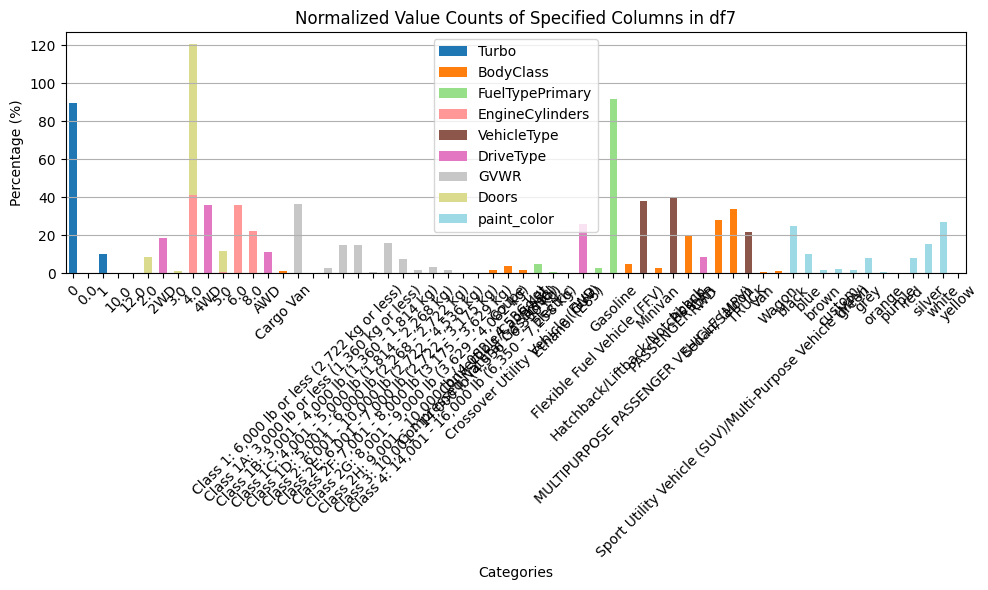

In [33]:
normalized_df = pd.DataFrame(normalized_counts)

# Plot a stacked bar graph
plt.figure(figsize=(10, 6))
normalized_df.plot(kind='bar', stacked=True, colormap='tab20', ax=plt.gca())
plt.title('Normalized Value Counts of Specified Columns in df7')
plt.xlabel('Categories')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
num_feats = ['odometer', 'ModelYear', 'displ']